In [1]:
import numpy as np
import xarray as xr
import os.path as op
import dask.array as dsar
from dask.diagnostics import ProgressBar
from scipy.io import loadmat
from scipy.interpolate import PchipInterpolator as pchip
from xmitgcm import open_mdsdataset
from xgcm.grid import Grid
import xrft
from matplotlib.colors import SymLogNorm
from matplotlib import colors
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bdir = '/swot/SUM02/takaya/channelMOC-Darwin/'
pdir = '/swot/SUM05/takaya/MITgcm/channel/runs/'

In [3]:
# 20kmMLI_mp113-15_mu15-114_Kp01-018_Ki59-105_Kn015-035_g28-168_mz40_rFe1
ys, dy = (64,10)
dt = 18e2
df = 48
# ts = int(360*86400*ys/8e2 + 30e0*360*86400/12e2 + 12e0*360*86400/dt) # no S.B. 
ts = int(360*86400*ys/8e2 + 0e0*360*86400/12e2 + 112e0*360*86400/36e2 + 55*360*86400/dt) # S.B.
# ts = int(360*86400*ys/8e2)
te = int(ts+360*86400*dy/dt)
print(ts,te)

4406400 4579200


In [11]:
# 20kmMLI_Ce007_postSpunUp
ys, dy = (64,5)
dt = 18e2
df = 48
# ts = int(360*86400*ys/8e2 + 30e0*360*86400/12e2 + 12e0*360*86400/dt) # no S.B. 
ts = int(360*86400*ys/8e2 + 0e0*360*86400/12e2 + 112e0*360*86400/36e2 + 107*360*86400/dt) # S.B.
# ts = int(360*86400*ys/8e2)
te = int(ts+360*86400*dy/dt)
print(ts,te)

5304960 5391360


In [3]:
# 20kmMLI_Ce01_postSpunUp
ys, dy = (64,5)
dt = 18e2
df = 48
# ts = int(360*86400*ys/8e2 + 30e0*360*86400/12e2 + 12e0*360*86400/dt) # no S.B. 
ts = int(360*86400*ys/8e2 + 0e0*360*86400/12e2 + 112e0*360*86400/36e2 + 117*360*86400/dt) # S.B.
# ts = int(360*86400*ys/8e2)
te = int(ts+360*86400*dy/dt)
print(ts,te)

5477760 5564160


In [14]:
# 20kmMLI_GM1000  
ys, dy = (64,5)
dt = 18e2
df = 1440
# ts = int(360*86400*ys/8e2 + 30e0*360*86400/12e2 + 12e0*360*86400/dt) # no S.B. 
ts = int(360*86400*ys/8e2 + 0e0*360*86400/12e2 + 112e0*360*86400/36e2 + 137*360*86400/dt) # S.B.
# ts = int(360*86400*ys/8e2)
te = int(ts+360*86400*dy/dt)
print(ts,te)

5823360 5909760


In [4]:
dsave = open_mdsdataset(op.join(bdir,'20km_GM1000'), 
                       grid_dir=op.join(pdir,'20km_grid'), iters=range(ts+df,te+df,df),
                       prefix=['Ttave','wVeltave',
                              'PTRtave03'
#                               ,'PtrFlux03'
                              ], delta_t=dt
                      )
dsave

/home/takaya/xmitgcm/xmitgcm/mds_store.py:721: UserWarning: Couldn't find available_diagnostics.log in /swot/SUM02/takaya/channelMOC-Darwin/20km_GM1000. Using default version.
  "in %s. Using default version." % data_dir)
/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:    (XC: 50, XG: 50, YC: 100, YG: 100, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 60)
Coordinates:
  * XC         (XC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * YC         (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * XG         (XG) >f4 0.0 20000.0 40000.0 60000.0 80000.0 100000.0 ...
  * YG         (YG) >f4 0.0 20000.0 40000.0 60000.0 80000.0 100000.0 ...
  * Z          (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 ...
  * Zp1        (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 ...
  * Zu         (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl         (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA         (YC, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    dxG        (YG, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    dyG        (YC, XG) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    Depth      (YC, XC) >f4 dask.array<

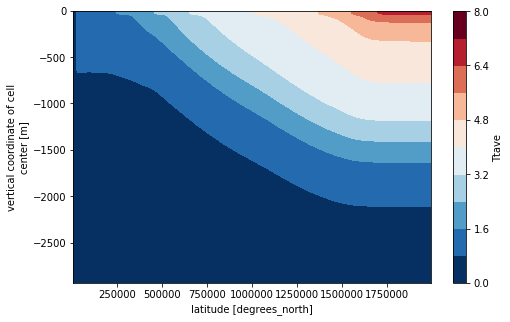

In [38]:
dsave.Ttave.mean(['time','XC']).plot.contourf(figsize=(8,5), levels=np.linspace(0,8,11),
                                             cmap='RdBu_r')

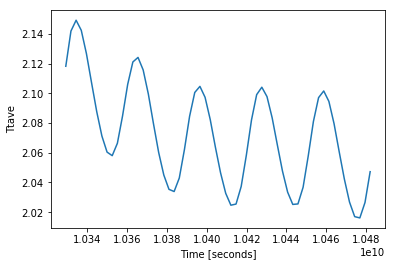

In [9]:
dsave.Ttave.mean(['Z','YC','XC']).plot()

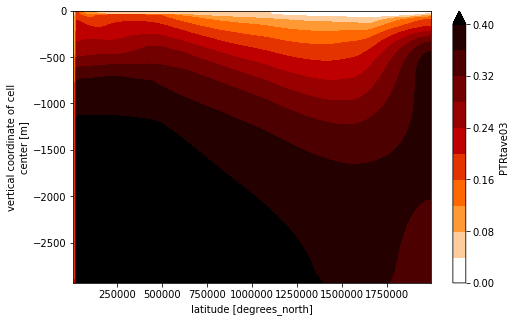

In [39]:
(dsave.PTRtave03.mean(['time','XC'])*1e3).plot.contourf(figsize=(8,5), levels=np.linspace(0,.4,11),
                                                             cmap='gist_heat_r')

/home/takaya/xmitgcm/xmitgcm/mds_store.py:721: UserWarning: Couldn't find available_diagnostics.log in /swot/SUM02/takaya/channelMOC-Darwin/20km_GM1000. Using default version.
  "in %s. Using default version." % data_dir)
/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


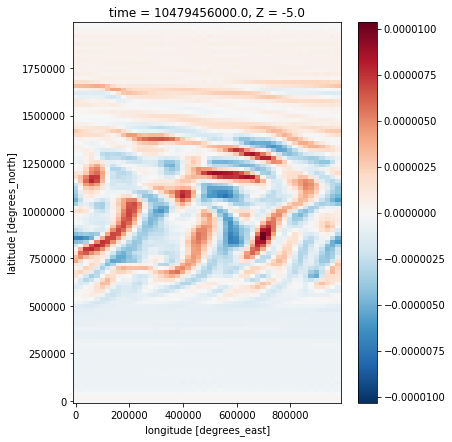

In [8]:
dspuv = open_mdsdataset(op.join(bdir,'20km_GM1000'), 
                       grid_dir=op.join(pdir,'20km_grid'), iters=range(ts,te,1440),
                       prefix=['U','V',
                              ], delta_t=dt
                       )
grid = Grid(dspuv, periodic=['X'])
zeta = (-grid.diff(dspuv.U * dspuv.dxC, 'Y', boundary='fill') + grid.diff(dspuv.V * dspuv.dyC, 'X'))/dspuv.rAz
zeta[-1,0].plot(figsize=(6,7))

In [15]:
ds = open_mdsdataset(op.join(bdir,'20km_GM1000'), 
                    grid_dir=op.join(pdir,'20km_grid'), iters=range(ts+48,te+48,48),
                    prefix=['MOMtave','FeTtave','BIOtave',
                           'KPPboundary'
                           ], delta_t=dt
                    ).sel(YC=slice(6e5,14e5),YG=slice(6e5,14e5))
ds

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:   (XC: 50, XG: 50, YC: 40, YG: 41, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 1800)
Coordinates:
  * XC        (XC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * YC        (YC) >f4 610000.0 630000.0 650000.0 670000.0 690000.0 710000.0 ...
  * XG        (XG) >f4 0.0 20000.0 40000.0 60000.0 80000.0 100000.0 120000.0 ...
  * YG        (YG) >f4 600000.0 620000.0 640000.0 660000.0 680000.0 700000.0 ...
  * Z         (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1       (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu        (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl        (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA        (YC, XC) >f4 dask.array<shape=(40, 50), chunksize=(40, 50)>
    dxG       (YG, XC) >f4 dask.array<shape=(41, 50), chunksize=(41, 50)>
    dyG       (YC, XG) >f4 dask.array<shape=(40, 50), chunksize=(40, 50)>
    Depth     (YC, X

In [16]:
grid = Grid(ds, periodic=['X'])

In [17]:
P1 = ds.TRAC22
P2 = ds.TRAC23
# Z1 = ds.TRAC08
# Z2 = ds.TRAC12
PP = ds.PP
Fe1D = ds.TRAC03

In [ ]:
Fe1D[:,:8]

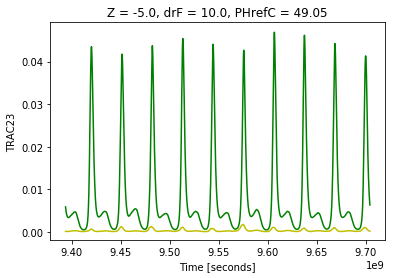

In [10]:
fig,ax = plt.subplots()
P1[:,0].sel(YC=slice(6e5,14e5)).mean(['YC','XC']).plot(ax=ax, color='g')
P2[:,0].sel(YC=slice(6e5,14e5)).mean(['YC','XC']).plot(ax=ax, color='y')

In [18]:
P1.coords['days'] = ('time',np.tile(range(360),dy))
P2.coords['days'] = ('time',np.tile(range(360),dy))
# Z1.coords['days'] = ('time',np.tile(range(360),dy))
# Z2.coords['days'] = ('time',np.tile(range(360),dy))
PP.coords['days'] = ('time',np.tile(range(360),dy))
with ProgressBar():
    P1day = P1.load().groupby('days').median(['time','YC','XC'])
    P2day = P2.load().groupby('days').median(['time','YC','XC'])
#     Z1day = Z1.groupby('days').mean(['time']).compute()
#     Z2day = Z2.groupby('days').mean(['time']).compute()
    PPday = PP.load().groupby('days').median(['time','YC','XC'])

[########################################] | 100% Completed |  2min 19.5s
[########################################] | 100% Completed |  6.7s
[########################################] | 100% Completed |  6.2s


In [19]:
nz = 8
with ProgressBar():
    P1Cday = (grid.cumsum(P1day*ds.drF,'Z',boundary='fill')[:,nz]
              * np.abs(ds.Zl[nz])**-1*106.*12.).compute()
    P2Cday = (grid.cumsum(P2day*ds.drF,'Z',boundary='fill')[:,nz]
              * np.abs(ds.Zl[nz])**-1*106.*12.).compute()
#     Z1Cday = (grid.cumsum(Z1day*ds.drF,'Z',boundary='fill')[:,nz]
#               * np.abs(ds.Zl[nz])**-1*106.*12.).compute()
#     Z2Cday = (grid.cumsum(Z2day*ds.drF,'Z',boundary='fill')[:,nz]
#               * np.abs(ds.Zl[nz])**-1*106.*12.).compute()
#     P1Cintg = (P1day*ds.drF).sum('Z').compute()
#     P2Cintg = (P2day*ds.drF).sum('Z').compute()
#     Z1Cintg = (Z1day*ds.drF).sum('Z').compute()
#     Z2Cintg = (Z2day*ds.drF).sum('Z').compute()
PtotCday = P1Cday+P2Cday
PPCday = PPday*106.*12.

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


In [61]:
dsave = (P1day+P2day).to_dataset(name='Ptot_d')
dsave['dz'] = ds.drF
dsave['Z'] = ds.Zl
dsave.to_netcdf(op.join(bdir,'Ptot_600-1400km_20kmMLI-02kmDailyClim.nc'))
dsave

<xarray.Dataset>
Dimensions:  (Z: 40, Zl: 40, days: 360)
Coordinates:
    Z        (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ...
  * days     (days) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
Data variables:
    Ptot_d   (days, Z) float32 0.005880043 0.0059101423 0.0059450497 ...
    dz       (Z) >f4 dask.array<shape=(40,), chunksize=(40,)>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


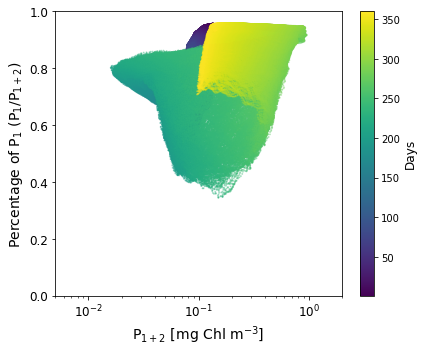

In [204]:
colors = Ptot.days.data[:,np.newaxis,np.newaxis]*np.ones((40,50))+1.

fig, ax = plt.subplots(figsize=(6,5))
fig.set_tight_layout(True)
for i in range(360):
    if i == 0:
        im = ax.scatter((Ptot)[i]*2e-2, (P1Cday.sel(YC=slice(6e5,14e5))/Ptot)[i],
                       c=colors[i], alpha=360./(360.+3*i),
                       s=1., vmin=1., vmax=360., rasterized=True
                       )
    else:
        ax.scatter((Ptot)[i]*2e-2, (P1Cday.sel(YC=slice(6e5,14e5))/Ptot)[i],
                  c=colors[i], alpha=360./(360.+3*i),
                  s=1., vmin=1., vmax=360., rasterized=True
                  )
ax.set_xscale('log')
ax.set_xlim([5e-3,2e0])
ax.set_ylim([0.,1.])
cbar = fig.colorbar(im, ax=ax)
cbar.set_label(r"Days", fontsize=12)
ax.set_xlabel(r"P$_{1+2}$ [mg Chl m$^{-3}$]", fontsize=14)
ax.set_ylabel(r"Percentage of P$_1$ (P$_1$/P$_{1+2}$)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.savefig(op.join(ddir,'Figures/P1vsP_20km.pdf'))

In [122]:
viirsdir = '/swot/SUM05/takaya/VIIRS/monthly/'
cbpm = xr.open_dataset(op.join(viirsdir,'CbPM-VIIRS-monthly_40-70S.nc')).cbpm
cbpm_ker = cbpm.sel(lon=slice(100,150))
c = xr.open_dataset(op.join(viirsdir,'Carbon-VIIRS-monthly_40-70S.nc')).carbon
c_ker = c.sel(lon=slice(100,150))
print(c_ker.attrs)

# c_ker.coords['iMONTH'] = ('iTIME', months)

with ProgressBar():
    cbpm_ker_mon = cbpm_ker.groupby('months').mean('iTIME').compute()
    c_ker_mon = c_ker.groupby('months').mean('iTIME').compute()
    cbpm_ker_std = cbpm_ker.groupby('months').std(['iTIME','lat','lon']).compute()
    c_ker_std = c_ker.groupby('months').std(['iTIME','lat','lon']).compute()
    
del cbpm, c, cbpm_ker, c_ker
c_ker_mon

OrderedDict([('units', 'mg C m-3')])


<xarray.DataArray 'carbon' (months: 12, lat: 180, lon: 300)>
array([[[15.112427, 14.852038, ..., 12.71562 , 12.428508],
        [15.321337, 15.516882, ..., 12.616169, 12.885255],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[16.136292, 15.66229 , ..., 11.292799, 11.285312],
        [15.517662, 15.276718, ..., 11.046855, 10.657256],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       ...,

       [[13.21138 , 12.787419, ..., 17.215484, 17.393421],
        [12.773817, 13.044801, ..., 17.452012, 16.252701],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[16.93975 , 16.80695 , ..., 16.324605, 16.893064],
        [16.262466, 16.190208, ..., 16.751794, 16.669233],
        ...,
        [      nan,       nan, ...,       

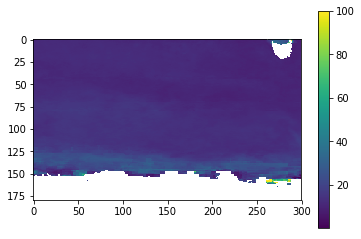

In [15]:
plt.imshow(c_ker_mon.mean('months'), vmax=1e2)
plt.colorbar()

In [104]:
cafedir = '/swot/SUM05/takaya/CAFE/'
decaf = loadmat(op.join(cafedir,'CAFE'), appendmat=True)
cafe = decaf['CAFE']
lat = decaf['Lat1']
lon = decaf['Lon1']
ppcb = np.zeros((12,180,360))
for i in range(12):
    ppcb[i] = cafe[:,:,i]
    
decaf = xr.DataArray(ppcb, dims=['month','lat','lon'],
                 coords={'month':range(1,13),'lat':lat[:,0],'lon':lon[0,:]}
                 ).to_dataset(name='carbon')
decaf_SO = decaf.sel(lat=slice(-45,-65),lon=slice(50,180))
del decaf, ppcb
decaf_SO

<xarray.Dataset>
Dimensions:  (lat: 20, lon: 130, month: 12)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * lat      (lat) float64 -45.5 -46.5 -47.5 -48.5 -49.5 -50.5 -51.5 -52.5 ...
  * lon      (lon) float64 50.5 51.5 52.5 53.5 54.5 55.5 56.5 57.5 58.5 59.5 ...
Data variables:
    carbon   (month, lat, lon) float64 635.4 618.2 587.5 501.0 514.8 526.0 ...

In [80]:
# P1_intg = (P1*106.*12.*ds.hFacC*ds.drF).sum(dim='Z')
# P2_intg = (P2*106.*12.*ds.hFacC*ds.drF).sum(dim='Z')
# P1_intg

In [79]:
# sosedir = '/swot/SUM05/takaya/SOSE'
# sose = xr.open_dataset(op.join(sosedir,'3day_ave/bsose_i105_2008to2012_3day_Phyto.nc'))
# P_sose = sose.phyto
# P_sose.attrs = sose.phyto.attrs

# gridSOSE = xr.open_dataset(op.join(sosedir,'3day_ave/grid.nc'))

# P_sose.coords['iTIME'] = ('iTIME',range(609))
# P_sose.coords['iDEPTH'] = ('iDEPTH',gridSOSE.DRF.data)
# P_sose.coords['iLAT'] = ('iLAT',gridSOSE.YC.data[:,0])
# P_sose.coords['iLON'] = ('iLON',gridSOSE.XC.data[0,:])

# P_kersurf = (P_sose*P_sose.iDEPTH)[:,:12].sum('iDEPTH').sel(iLON=slice(100,140)) * 1e-2
# del P_sose
# DinY = np.tile(range(121),5)
# P_kersurf = P_kersurf[:-4]
# P_kersurf.coords['DinY'] = ('iTIME',DinY)
# P_kersurf = P_kersurf.groupby('DinY').mean('iTIME')

# P_kersurf

In [78]:
# sose = xr.open_dataset(op.join(sosedir,'3day_ave/bsose_i105_2008to2012_3day_NPP.nc'))
# PP_sose = sose.NPP
# print(sose.NPP.attrs)
# PP_sose.attrs = sose.NPP.attrs

# gridSOSE = xr.open_dataset(op.join(sosedir,'3day_ave/grid.nc'))

# PP_sose.coords['iTIME'] = ('iTIME',range(609))
# PP_sose.coords['iDEPTH'] = ('iDEPTH',gridSOSE.DRF.data)
# PP_sose.coords['iLAT'] = ('iLAT',gridSOSE.YC.data[:,0])
# PP_sose.coords['iLON'] = ('iLON',gridSOSE.XC.data[0,:])

# PP_kersurf = (PP_sose*PP_sose.iDEPTH).sel(iLON=slice(100,140)).sum('iDEPTH')
# del PP_sose
# DinY = np.tile(range(121),5)
# PP_kersurf = PP_kersurf[:-4]
# PP_kersurf.coords['DinY'] = ('iTIME',DinY)
# PP_kersurf = PP_kersurf.groupby('DinY').mean('iTIME')

In [105]:
sosedir = '/swot/SUM05/takaya/SOSE'
dsSOSE = xr.open_dataset(op.join(sosedir,'3day_ave/Biomass-Productivity_3D_Kerguelen.nc'))
P_kersurf = dsSOSE.Phyto_100m
PP_kersurf = dsSOSE.Prod_intg

In [13]:
PPintg = (PPCday*ds.hFacC*ds.drF).sum(dim='Z')
PPintg

<xarray.DataArray (days: 360, YC: 40, XC: 50)>
dask.array<shape=(360, 40, 50), dtype=float32, chunksize=(360, 40, 50)>
Coordinates:
  * days     (days) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * XC       (XC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * YC       (YC) >f4 610000.0 630000.0 650000.0 670000.0 690000.0 710000.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(40, 50), chunksize=(40, 50)>
    Depth    (YC, XC) >f4 dask.array<shape=(40, 50), chunksize=(40, 50)>

In [14]:
PintgC = ((P1+P2)*106*12*ds.hFacC*ds.drF).sum(dim='Z')
r = np.log(PintgC[1:]/PintgC[:-1].data) * PintgC.time.diff('time',1)**-1
tnew = .5*(ds.time.data[1:]+ds.time.data[:-1])
func = pchip(tnew, r, axis=0)

In [15]:
r = xr.DataArray(func(ds.time.data), dims=P1[:,0].dims, coords=P1[:,0].coords)
r*86400

<xarray.DataArray (time: 3600, YC: 40, XC: 50)>
array([[[ 0.040168,  0.045652, ..., -0.15456 , -0.082527],
        [ 0.023197,  0.011803, ...,  0.03985 ,  0.02567 ],
        ...,
        [ 0.014124, -0.016645, ..., -0.100941, -0.037815],
        [-0.014262,  0.006991, ..., -0.091104,  0.021116]],

       [[-0.052418,  0.017742, ..., -0.034278, -0.114282],
        [ 0.041757,  0.018663, ...,  0.040869,  0.046464],
        ...,
        [ 0.018469,  0.029938, ..., -0.155427, -0.137222],
        [-0.008805, -0.00883 , ..., -0.141638, -0.06848 ]],

       ...,

       [[ 0.03669 , -0.025885, ...,  0.018579,  0.02959 ],
        [-0.003353,  0.001072, ...,  0.024153,  0.025877],
        ...,
        [-0.296975, -0.080881, ..., -0.031388, -0.321731],
        [-0.356351, -0.216964, ...,  0.167245, -0.108306]],

       [[ 0.048261,  0.036385, ..., -0.032984,  0.005723],
        [ 0.041318,  0.002415, ..., -0.032777,  0.025702],
        ...,
        [-0.480277, -0.326773, ...,  0.014787,  0.13637

In [65]:
print(ds.ADVrTr03.attrs)
print(ds.DFrITr03.attrs)
print(ds.DFrETr03.attrs)
print(ds.DFyETr03.attrs)

OrderedDict([('standard_name', 'ADVrTr03'), ('long_name', 'Vertical   Advective Flux of FeT'), ('units', 'mM/m^3 .m^3/s')])
OrderedDict([('standard_name', 'DFrITr03'), ('long_name', 'Vertical Diffusive Flux of FeT (Implicit part)'), ('units', 'mM/m^3 .m^3/s')])
OrderedDict([('standard_name', 'DFrETr03'), ('long_name', 'Vertical Diffusive Flux of FeT (Explicit part)'), ('units', 'mM/m^3 .m^3/s')])
OrderedDict([('standard_name', 'DFyETr03'), ('long_name', 'Meridional Diffusive Flux of FeT'), ('units', 'mM/m^3 .m^3/s'), ('mate', 'DFxETr03')])


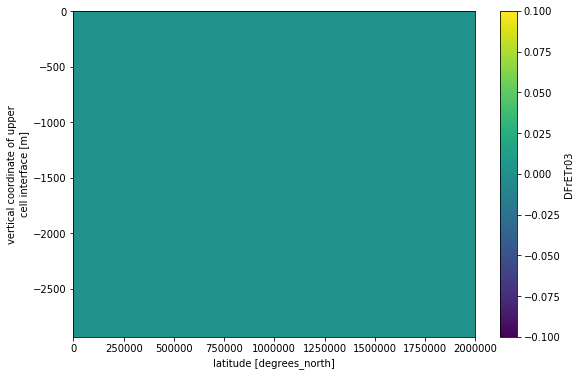

In [67]:
ds.DFrETr03.mean(['time','XC']).plot(figsize=(9,6))

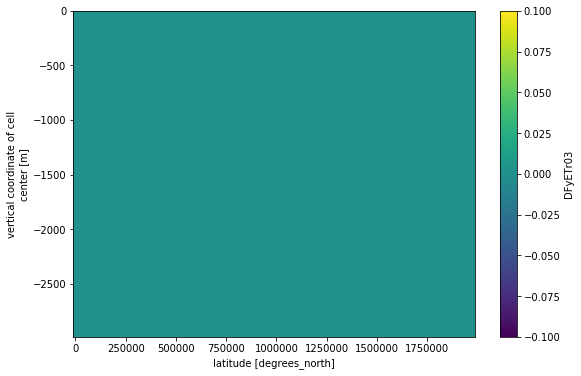

In [68]:
ds.DFyETr03.mean(['time','XC']).plot(figsize=(9,6))

In [75]:
print(ds.DFyETr03[0,:8].sum().values, ds.DFrETr03[0,:8].sum().values)

0.0 0.0


In [111]:
ds.Zl[8]

<xarray.DataArray 'Zl' ()>
array(-113., dtype=float32)
Coordinates:
    Zl       >f4 -113.0
Attributes:
    standard_name:      depth_at_upper_w_location
    long_name:          vertical coordinate of upper cell interface
    units:              m
    positive:           down
    axis:               Z
    c_grid_axis_shift:  -0.5

In [16]:
# l = mu - r
r.coords['days'] = ('time',np.tile(range(360),dy))
# mu.coords['days'] = ('time',np.tile(range(360),dy))
# l.coords['days'] = ('time',np.tile(range(360),dy))
# FadvW_d = ds.ADVrTr03
# dfib_d = ds.DFrITr03
# FadvW_d.coords['days'] = ('time',np.tile(range(360),dy))
# dfib_d.coords['days'] = ('time',np.tile(range(360),dy))
with ProgressBar():
    rday = r.groupby('days').mean('time').compute()
#     FadvW_d = FadvW_d[:,7].sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
#     dfib_d = dfib_d[:,7].sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
#     muday = mu.groupby('days').mean('time')
#     lday = l.groupby('days').mean('time')

In [20]:
hbl99 = xr.DataArray(np.percentile(ds.KPPhbl, 99, axis=-1), dims=['time','YC'],
                    coords={'time':ds.time,'YC':ds.YC})
hbl99

<xarray.DataArray (time: 1800, YC: 40)>
array([[30., 30., 30., ..., 30., 30., 30.],
       [30., 30., 30., ..., 30., 30., 30.],
       [30., 30., 30., ..., 30., 30., 30.],
       ...,
       [30., 30., 30., ..., 30., 30., 30.],
       [30., 30., 30., ..., 30., 30., 30.],
       [30., 30., 30., ..., 30., 30., 30.]])
Coordinates:
  * time     (time) float64 1.048e+10 1.048e+10 1.048e+10 1.048e+10 ...
  * YC       (YC) >f4 610000.0 630000.0 650000.0 670000.0 690000.0 710000.0 ...

In [21]:
hbl99.coords['day'] = ('time',np.tile(range(360),dy))
hbl99.coords['seas'] = ('time',np.tile(np.repeat(range(4),90),dy))
hbl99.coords['month'] = ('time',np.tile(np.repeat(range(12),30),dy))
# hbl99.to_dataset(name='hbl99').to_netcdf(op.join(bdir,'KPPhbl_99percentile_20kmMLI-Ce007-02km.nc'))
# hbl99 = xr.open_dataset(op.join(bdir,'KPPhbl_99percentile_20kmMLI-Ce007_Tau55-02km.nc'), 
#                         decode_times=False).hbl99
with ProgressBar():
    hbl99_day = hbl99.groupby('day').mean('time').compute()
# #     hbl99_sea = hbl99.groupby('seas').mean('time').compute()
# #     hbl99_mon = hbl99.groupby('month').mean('time').compute()
hbl99_day

<xarray.DataArray (day: 360, YC: 40)>
array([[30., 30., 30., ..., 30., 30., 30.],
       [30., 30., 30., ..., 30., 30., 30.],
       [30., 30., 30., ..., 30., 30., 30.],
       ...,
       [30., 30., 30., ..., 30., 30., 30.],
       [30., 30., 30., ..., 30., 30., 30.],
       [30., 30., 30., ..., 30., 30., 30.]])
Coordinates:
  * YC       (YC) >f4 610000.0 630000.0 650000.0 670000.0 690000.0 710000.0 ...
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

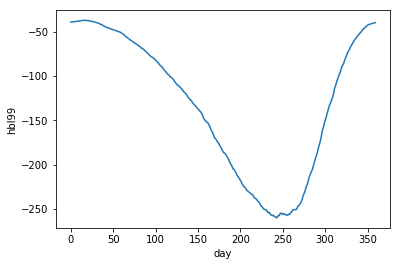

In [40]:
(-hbl99_day).sel(YC=slice(6e5,14e5)).mean(['YC']).plot()

In [26]:
# MXLD = xr.open_dataset(op.join(ddir,'MXLD_20km.nc')).MXLD
# hbl99 = xr.open_dataset(op.join(pdir,'KPPhbl_99percentile_20kmMLI-02km.nc')).hbl99
# MXLD.coords['DinY'] = ('time',np.tile(range(360),5))
# hbl99_day = hbl99.groupby('day').mean(['time'])
zz = xr.DataArray(np.abs(ds.Zl).data[np.newaxis,:,np.newaxis]*np.ones((360,100))[:,np.newaxis,:],
                 dims=['day','Zl','YC'])
nMXLD = np.argmin(np.abs(zz-hbl99_day), axis=1)
nMXLD

<xarray.DataArray (day: 360, YC: 100)>
array([[ 0, 19, 17, ...,  3,  3,  3],
       [ 0, 19, 18, ...,  3,  3,  3],
       [ 0, 19, 18, ...,  3,  3,  3],
       ...,
       [ 0, 19, 18, ...,  3,  3,  3],
       [ 0, 19, 18, ...,  3,  3,  3],
       [ 0, 19, 18, ...,  3,  3,  3]])
Coordinates:
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * YC       (YC) float64 1e+04 3e+04 5e+04 7e+04 9e+04 1.1e+05 1.3e+05 ...

In [27]:
nXLD100 = nMXLD.data.copy()
nXLD100[nXLD100<8] = 8
nXLD100 = xr.DataArray(nXLD100, dims=nMXLD.dims, coords=nMXLD.coords)
nXLD100

<xarray.DataArray (day: 360, YC: 100)>
array([[ 8, 19, 17, ...,  8,  8,  8],
       [ 8, 19, 18, ...,  8,  8,  8],
       [ 8, 19, 18, ...,  8,  8,  8],
       ...,
       [ 8, 19, 18, ...,  8,  8,  8],
       [ 8, 19, 18, ...,  8,  8,  8],
       [ 8, 19, 18, ...,  8,  8,  8]])
Coordinates:
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * YC       (YC) float64 1e+04 3e+04 5e+04 7e+04 9e+04 1.1e+05 1.3e+05 ...

In [226]:
# diff = ds.DFrITr03
# diff_z = grid.diff(diff, 'Z', boundary='fill')/(ds.rA)
# advW = ds.ADVrTr03
# # advV = ds.ADVyTr03
# adv_z = grid.diff(advW,'Z',boundary='fill')/(ds.rA)
# # advy = grid.diff(advV, 'Y', boundary='fill')/(ds.rA*ds.drF).mean('XC')

# diff_z.coords['days'] = ('time',np.tile(range(360),dy))
# adv_z.coords['days'] = ('time',np.tile(range(360),dy))

# with ProgressBar():
#     dff_z_100 = diff_z[:,7].sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
#     adv_z_100 = adv_z[:,7].sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
    
# adv_z_100

[########################################] | 100% Completed | 26.4s
[########################################] | 100% Completed | 24.9s


<xarray.DataArray (days: 360)>
array([-1.031502e-11, -9.733132e-12, -9.037869e-12, ..., -1.270969e-11,
       -1.261576e-11, -1.267856e-11], dtype=float32)
Coordinates:
    Z        float32 -102.0
  * days     (days) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [107]:
# FadvW_zave = (FadvW_d*ds.drC[4:8].data[np.newaxis,:,np.newaxis,np.newaxis]).sum('Zl')*np.abs(ds.Z[3].data - ds.Z[8].data)**-1
# dfib_zave = (dfib_d*ds.drC[:5].data[np.newaxis,:,np.newaxis,np.newaxis]).sum('Zl')*np.abs(ds.Z[5].data)**-1
# FadvW_zave

<xarray.DataArray 'ADVrTr03' (days: 360, YC: 40, XC: 50)>
array([[[ 0.020733,  0.020158, ..., -0.008407, -0.034709],
        [-0.016972, -0.072815, ...,  0.152161, -0.114249],
        ...,
        [ 0.108296,  0.0154  , ..., -0.056159, -0.002177],
        [-0.09013 , -0.007724, ...,  0.011673,  0.059153]],

       [[-0.052321, -0.037872, ...,  0.029881,  0.018722],
        [-0.143774,  0.043152, ..., -0.010154,  0.175559],
        ...,
        [ 0.012369,  0.097832, ...,  0.030509, -0.059675],
        [ 0.039297, -0.061627, ...,  0.019872,  0.001724]],

       ...,

       [[ 0.108697, -0.001957, ..., -0.007139,  0.081417],
        [-0.12155 ,  0.120485, ..., -0.141356,  0.0054  ],
        ...,
        [-0.024039, -0.024041, ...,  0.077126, -0.020461],
        [ 0.014907,  0.036322, ..., -0.006337, -0.077644]],

       [[ 0.027007,  0.153294, ..., -0.020624,  0.014334],
        [-0.026846, -0.070367, ..., -0.112653, -0.072114],
        ...,
        [ 0.009703, -0.041246, ...,  0.018558

(-5e-10, 5e-10)

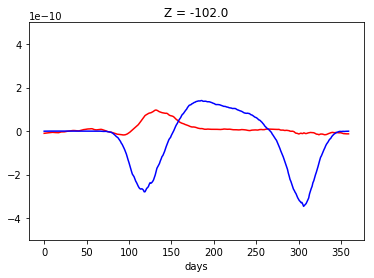

In [229]:
fig, ax = plt.subplots()
# ax2 = ax.twinx()
adv_z_100.plot(ax=ax, color='r')
dff_z_100.plot(ax=ax, color='b')
ax.set_ylim([-5.e-10,5.e-10])

In [23]:
dsnap = open_mdsdataset(op.join(bdir,'20km_GM1000'), 
                       grid_dir=op.join(pdir,'20km_grid'), iters=range(ts,te,720),
                       prefix=['W','PTRACER03','PTRACER26'], delta_t=dt
                       ).sel(YC=slice(6e5,14e5),YG=slice(6e5,14e5))
dsmon = open_mdsdataset(op.join(bdir,'20km_GM1000'), 
                       grid_dir=op.join(pdir,'20km_grid'), iters=range(ts+1440,te+1440,1440),
                       prefix=['wVeltave','PTRtave03','PTRtave26'], delta_t=dt
                       ).sel(YC=slice(6e5,14e5),YG=slice(6e5,14e5))
wsp = dsnap.W
Fesp = dsnap.PTRACER03
POCsp = dsnap.PTRACER26
wm = dsmon.wVeltave
Fem = dsmon.PTRtave03
POCm = dsmon.PTRtave26
print(wsp,wm)

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.DataArray 'W' (time: 120, Zl: 40, YC: 40, XC: 50)>
dask.array<shape=(120, 40, 40, 50), dtype=float32, chunksize=(1, 40, 40, 50)>
Coordinates:
  * XC       (XC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * YC       (YC) >f4 610000.0 630000.0 650000.0 670000.0 690000.0 710000.0 ...
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(40, 50), chunksize=(40, 50)>
    Depth    (YC, XC) >f4 dask.array<shape=(40, 50), chunksize=(40, 50)>
    iter     (time) int64 dask.array<shape=(120,), chunksize=(1,)>
  * time     (time) float64 1.048e+10 1.048e+10 1.048e+10 1.049e+10 ...
Attributes:
    standard_name:  sea_water_z_velocity
    long_name:      Vertical Component of Velocity
    units:          m s-1 <xarray.DataArray 'wVeltave' (time: 60, Zl: 40, YC: 40, XC: 50)>
dask.array<shape=(60, 40, 40, 50), dtype=float32, chunksize=(1, 40, 40, 50)>
Coordinates:
  * XC       (XC) >f4 10000.0 30000.0 50000.0 

In [24]:
diff = ds.DFrITr03
advW = ds.ADVrTr03
dfz_cons = diff/(ds.rA)
adz_cons = advW/(ds.rA)
dfz_cons.coords['day'] = ('time',np.tile(range(360),dy))
adz_cons.coords['day'] = ('time',np.tile(range(360),dy))
wsp.coords['seas'] = ('time',np.tile(np.repeat(range(4),6),dy))
Fesp.coords['seas'] = ('time',np.tile(np.repeat(range(4),6),dy))
wm.coords['seas'] = ('time',np.tile(np.repeat(range(4),3),dy))
Fem.coords['seas'] = ('time',np.tile(np.repeat(range(4),3),dy))
POCsp.coords['seas'] = ('time',np.tile(np.repeat(range(4),6),dy))
POCm.coords['seas'] = ('time',np.tile(np.repeat(range(4),3),dy))
wp = wsp.groupby('seas') - wm.groupby('seas').mean(['time','XC'])
Fep = Fesp.groupby('seas') - Fem.groupby('seas').mean(['time','XC'])
POCp = POCsp.groupby('seas') - POCm.groupby('seas').mean(['time','XC'])

In [25]:
wpFep = wp*grid.interp(Fep,'Z',boundary='fill')
wpFep.coords['day'] = ('time',np.tile(range(24),dy))
with ProgressBar():
    dfz_c = dfz_cons.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','YC','XC']).compute()
#     adz_c = adz_cons.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','YC','XC']).compute()
    wpFep_d = wpFep.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','YC','XC']).compute()

[########################################] | 100% Completed |  2min 34.8s
[########################################] | 100% Completed | 17.9s


In [44]:
wpPOCp = wp*grid.interp(POCp,'Z',boundary='fill')
wpPOCp.coords['day'] = ('time',np.tile(range(24),dy))
with ProgressBar():
    wpPOCp_d = wpPOCp.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','YC','XC']).compute()

[########################################] | 100% Completed |  6.8s


In [27]:
dsGM = open_mdsdataset(op.join(bdir,'20km_GM1000'),
                      grid_dir=op.join(pdir,'20km_grid'), iters=range(ts,te,720),
                      prefix=['GMpsi15D',
                             ], delta_t=dt
                      )
dsGM

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 50, XG: 50, YC: 100, YG: 100, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 120)
Coordinates:
  * XC       (XC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * XG       (XG) >f4 0.0 20000.0 40000.0 60000.0 80000.0 100000.0 120000.0 ...
  * YG       (YG) >f4 0.0 20000.0 40000.0 60000.0 80000.0 100000.0 120000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu       (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    dxG      (YG, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    dyG      (YC, XG) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    Depth    (YC, XC) >f4 dask

In [28]:
gridGM = Grid(dsGM, periodic=['X'])
Psiyk = xrft.dft(dsGM.GM_PsiY, dim=['XC'], shift=False)
Psiy_x = dsar.fft.ifft((Psiyk*1j*2*np.pi*Psiyk.freq_XC).data, axis=-1).compute()
Psiy_x = gridGM.interp(xr.DataArray(Psiy_x.real, dims=dsGM.GM_PsiY.dims, coords=dsGM.GM_PsiY.coords),
                      'Y', boundary='fill')
with ProgressBar():
    wGM = (Psiy_x - gridGM.interp(gridGM.interp(gridGM.diff(dsGM.GM_PsiX*dsGM.dxC,'Y',boundary='fill')
                                               / dsGM.rAz,
                                               'Y',boundary='fill'),
                                 'X')
          ).compute()
wGM

/home/takaya/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:


[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  6.2s


<xarray.DataArray (time: 120, Zl: 40, YC: 100, XC: 50)>
array([[[[ 0.000000e+00, ...,  0.000000e+00],
         ...,
         [ 0.000000e+00, ...,  0.000000e+00]],

        ...,

        [[-1.282063e-07, ...,  1.487601e-07],
         ...,
         [ 4.754729e-06, ..., -2.708967e-06]]],


       ...,


       [[[ 0.000000e+00, ...,  0.000000e+00],
         ...,
         [ 0.000000e+00, ...,  0.000000e+00]],

        ...,

        [[-3.234805e-08, ...,  2.259828e-07],
         ...,
         [-3.538447e-07, ..., -3.042840e-06]]]])
Coordinates:
  * time     (time) float64 1.048e+10 1.048e+10 1.048e+10 1.049e+10 ...
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * XC       (XC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...

In [29]:
wGMFe = wGM.sel(YC=slice(6e5,14e5))*grid.interp(Fesp,'Z',boundary='fill')
wGMFe.coords['day'] = ('time',np.tile(range(24),dy))
with ProgressBar():
    wGMFe_d = wGMFe.groupby('day').mean(['time','YC','XC']).compute()

[########################################] | 100% Completed |  1.9s


In [49]:
wMLIPOCp = wMLI.sel(YC=slice(6e5,14e5))*grid.interp(POCp,'Z',boundary='fill')
wMLIPOCp.coords['day'] = ('time',np.tile(range(24),dy))
with ProgressBar():
    wMLIPOCp_d = wMLIPOCp.groupby('day').mean(['time','YC','XC']).compute()

[########################################] | 100% Completed |  2.6s


In [53]:
dsave = wpFep.to_dataset(name='wpFep')
dsave['wpPOCp'] = wpPOCp
dsave['wMLIFep'] = wMLIFep
dsave['wMLIPOCp'] = wMLIPOCp
dsave.to_netcdf(op.join(bdir,'EddyVertFlux_Fe-POC_20kmMLI-02km.nc'))

In [54]:
dsav = wpFep_d.to_dataset(name='wpFep')
dsav['wMLIFep'] = wMLIFep_d
dsav.to_netcdf(op.join(bdir,'wpFep_600-1400km_20kmMLI-02km.nc'))

In [30]:
Fe1D.coords['day'] = ('time',np.tile(np.roll(range(360),0),dy))
with ProgressBar():
    Fe_c = Fe1D.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','YC','XC']).compute()
Fe_c

[########################################] | 100% Completed |  1min 24.5s


<xarray.DataArray 'TRAC03' (day: 360, Z: 40)>
array([[3.810500e-06, 3.811248e-06, 3.828461e-06, ..., 4.102688e-04,
        4.129871e-04, 4.160865e-04],
       [3.849681e-06, 3.850104e-06, 3.865976e-06, ..., 4.102682e-04,
        4.129878e-04, 4.160926e-04],
       [3.890303e-06, 3.890418e-06, 3.905031e-06, ..., 4.102675e-04,
        4.129886e-04, 4.160988e-04],
       ...,
       [3.741776e-06, 3.743314e-06, 3.764629e-06, ..., 4.101996e-04,
        4.131261e-04, 4.164199e-04],
       [3.776147e-06, 3.777212e-06, 3.796815e-06, ..., 4.101965e-04,
        4.131240e-04, 4.164219e-04],
       [3.813088e-06, 3.813695e-06, 3.831672e-06, ..., 4.101937e-04,
        4.131221e-04, 4.164242e-04]], dtype=float32)
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ...
  * day      (day) int64 0 1 2 3 4 5 6 7 8 

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


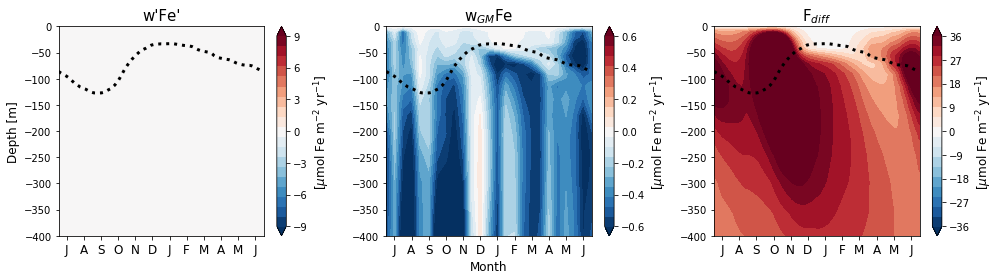

In [31]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']

fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
fig.set_tight_layout(True)
im1 = ax1.contourf(range(0,346,15), wpFep_d.Zl, wpFep_d.roll(day=-12).T*1e3*360*86400, 
                  levels=np.linspace(-9,9,20), 
                   cmap='RdBu_r', extend='both')
ax1.contourf(range(14,360,15), wpFep_d.Zl, wpFep_d.roll(day=-13).T*1e3*360*86400, 
            levels=np.linspace(-9,9,20), 
             cmap='RdBu_r', extend='both')
im2 = ax2.contourf(range(0,346,15), wGMFe_d.Zl, wGMFe_d.roll(day=-12).T*1e3*360*86400,
                  levels=1e-0*np.linspace(-.6,.6,20), 
                  extend='both', cmap='RdBu_r')
ax2.contourf(range(14,360,15), wGMFe_d.Zl, wGMFe_d.roll(day=-13).T*1e3*360*86400,
            levels=1e-0*np.linspace(-.6,.6,20), 
            extend='both', cmap='RdBu_r')
# im3 = ax3.contourf(range(360), Fe_c.Z, Fe_c.roll(day=-180).T*1e3, 
#                   levels=np.linspace(0,.3,11), cmap='OrRd', extend='max')
im3 = ax3.contourf(range(360), dfz_c.Zl, dfz_c.T.roll(day=-180)*1e3*(360*86400), 
                  levels=np.linspace(-36,36,20), 
                  cmap='RdBu_r', extend='both')
ax1.plot(range(360), -hbl99_day.sel(YC=slice(6e5,14e5)).mean(['YC']).roll(day=-180), 
       ls=':', lw=3, color='k')
ax2.plot(range(360), -hbl99_day.sel(YC=slice(6e5,14e5)).mean(['YC']).roll(day=-180), 
       ls=':', lw=3, color='k')
ax3.plot(range(360), -hbl99_day.sel(YC=slice(6e5,14e5)).mean(['YC']).roll(day=-180), 
       ls=':', lw=3, color='k')
ax1.set_title(r"w'Fe'", fontsize=15)
ax2.set_title(r"w$_{GM}$Fe", fontsize=15)
ax3.set_title(r"F$_{diff}$", fontsize=15)
ax1.set_ylabel(r"Depth [m]", fontsize=12)
ax2.set_xlabel(r"Month", fontsize=12)
ax1.set_xticks(np.linspace(14,344,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax1.set_ylim([-400,0])
ax2.set_xticks(np.linspace(14,344,12))
ax2.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax2.set_ylim([-400,0])
ax3.set_xticks(np.linspace(14,344,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax3.set_ylim([-400,0])
# fig.colorbar(im1, ax=ax1, ticks=[-10,-7.5,-5.,-2.5,0,2.5,5.,7.5,10])
# fig.colorbar(im2, ax=ax2, ticks=[-.8,-.6,-.4,-.2,0,.2,.4,.6,.8])
# cbar = fig.colorbar(im3, ax=ax3, ticks=[0,6,12,18,24,30])
# fig.subplots_adjust(right=0.85)
# cbar_ax = fig.add_axes([0.88, 0.16, 0.014, 0.68])
# cbar = fig.colorbar(im3, cax=cbar_ax, ticks=[-10,-8,-6,-4,-2,0,2,4,6,8,10])
# cbar.set_label(r'[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]', fontsize=12)
cbar1 = fig.colorbar(im1, ax=ax1, 
                    ticks=[-9,-6,-3,0,3,6,9]
                    )
cbar2 = fig.colorbar(im2, ax=ax2, 
                    ticks=[-.6,-.4,-.2,0,.2,.4,.6]
                    )
cbar3 = fig.colorbar(im3, ax=ax3, 
                    ticks=[-36,-27,-18,-9,0,9,18,27,36]
                    )
cbar1.set_label(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]", fontsize=12)
cbar2.set_label(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]", fontsize=12)
cbar3.set_label(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]", fontsize=12)
plt.savefig(op.join(bdir,'Figures/VerticalFeflux_20kmMLI-GM1000_02km.pdf'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


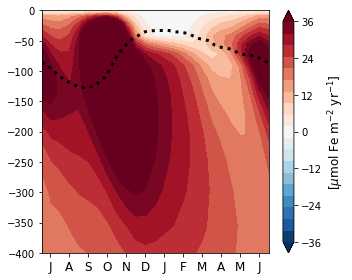

In [32]:
fig, ax = plt.subplots(figsize=(5,4))
fig.set_tight_layout(True)
im = ax.contourf(range(0,346,15), wpFep_d.Zl, (wpFep_d+wGMFe_d+dfz_c[::15].data).roll(day=-12).T*1e3*360*86400, 
                levels=np.linspace(-36,36,20), cmap='RdBu_r', extend='both')
ax.contourf(range(14,360,15), wpFep_d.Zl, (wpFep_d+wGMFe_d+dfz_c[::15].data).roll(day=-13).T*1e3*360*86400, 
           levels=np.linspace(-36,36,20), cmap='RdBu_r', extend='both')
cbar = fig.colorbar(im, ax=ax, ticks=[-36,-24,-12,0,12,24,36])
cbar.set_label(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]", fontsize=12)
ax.set_xticks(np.linspace(14,344,12))
ax.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax.set_ylim([-400,0])
ax.plot(range(360), -hbl99_day.sel(YC=slice(6e5,14e5)).mean(['YC']).roll(day=-180), 
       ls=':', lw=3, color='k')

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


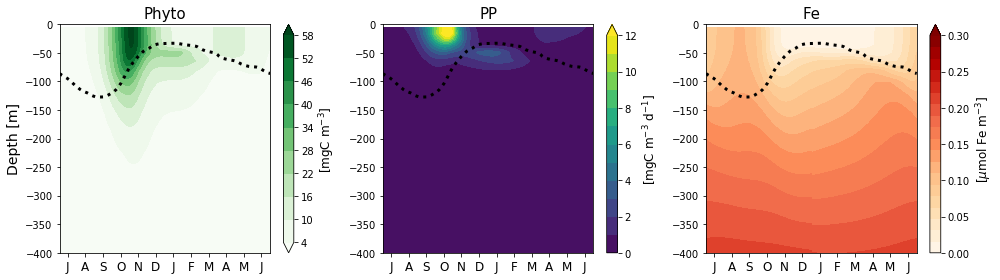

In [37]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
fig, (ax1,ax3,ax5) = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
fig.set_tight_layout(True)
# im1 = ax1.contourf(range(360), w2_sqrt.Zl, w2_sqrt.T.roll(day=-180)*86400, 
#                   levels=np.linspace(1,20.,11), cmap='Reds', extend='both')
# im2 = ax2.contourf(range(360), dbdz_d.Z, dbdz_d.T.roll(days=-180), 
#                   levels=np.linspace(-4e-5,4e-5,21), cmap='RdBu_r', extend='both')
# im1 = ax1.contourf(range(360), dFedz_d.Zl, dFedz_d.T.roll(days=-180)*1e3, 
#                   levels=np.linspace(0,.002,21), cmap='Oranges', extend='both')
# ax1.plot(range(360), ZFe_d.roll(days=-180), 'k:')
im1 = ax1.contourf(range(360), (P1day + P2day).Z, (P1day + P2day).T.roll(days=-180)*106.*12., 
                  levels=np.linspace(4,58,10), cmap='Greens', extend='both')
im3 = ax3.contourf(range(360), PPCday.Z, PPCday.T.roll(days=-180)*86400., 
                  levels=np.arange(0,13,1), extend='max')
im5 = ax5.contourf(range(360), Fe_c.Z, Fe_c.T.roll(day=-180)*1e3,
                  levels=np.linspace(0,0.3,20), 
                   extend='max', cmap='OrRd')
# ax1.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
# ax2.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
# ax3.pcolormesh(range(360), dfz_c.Zl, ((dfz_c-adz_c)/diff_M).T.roll(days=-180), 
#                vmax=1, vmin=-1., cmap='RdBu_r', norm=SymLogNorm(0.01), rasterized=True)
ax1.plot(range(360), -hbl99_day.sel(YC=slice(6e5,14e5)).mean(['YC']).roll(day=-180), 
       ls=':', lw=3, color='k')
ax5.plot(range(360), -hbl99_day.sel(YC=slice(6e5,14e5)).mean(['YC']).roll(day=-180), 
       ls=':', lw=3, color='k')
ax3.plot(range(360), -hbl99_day.sel(YC=slice(6e5,14e5)).mean(['YC']).roll(day=-180), 
       ls=':', lw=3, color='k')
# ax1.set_ylim([-4e2,0])
# ax2.set_ylim([-5e2,0])
ax1.set_ylim([-4e2,0])
ax3.set_ylim([-4e2,0])
ax5.set_ylim([-4e2,0])
# ax2.set_xlim([0,359])
# ax2.set_title(r"db$/$dz", fontsize=14)
ax1.set_title(r"Phyto", fontsize=15)
# ax1.set_title(r"dFe$/$dz", fontsize=15)
ax3.set_title(r"PP", fontsize=15)
ax5.set_title(r"Fe", fontsize=15)
# ax1.set_xticks(np.linspace(14,344,12))
# ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
# ax2.set_xticks(np.linspace(14,344,12))
# ax2.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax1.set_xticks(np.linspace(14,344,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax3.set_xticks(np.linspace(14,344,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax5.set_xticks(np.linspace(14,344,12))
ax5.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax1.set_ylabel(r"Depth [m]", fontsize=14)
# ax2.set_xlabel(r"Month", fontsize=13)
# fig.subplots_adjust(right=0.88)
# cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
# cbar = fig.colorbar(im, cax=cbar_ax)
# cbar1 = fig.colorbar(im1, ax=ax1, ticks=1e-4*np.array([0,4,8,12,16,20]))
# fig.colorbar(im2, ax=ax2)
cbar1 = fig.colorbar(im1, ax=ax1)
cbar3 = fig.colorbar(im3, ax=ax3)
cbar5 = fig.colorbar(im5, ax=ax5, ticks=[0,0.05,0.1,0.15,0.2,0.25,0.3])
cbar5.set_label(r"[$\mu$mol Fe m$^{-3}$]", fontsize=12)
cbar3.set_label(r"[mgC m$^{-3}$ d$^{-1}$]", fontsize=12)
# cbar1.set_label(r"[$\mu$mol Fe m$^{-4}$]", fontsize=12)
cbar1.set_label(r"[mgC m$^{-3}$]", fontsize=12)
plt.savefig(op.join(bdir,'Figures/P-PP-Fe_dailyclimatology_20km_XLIGM1000.pdf'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


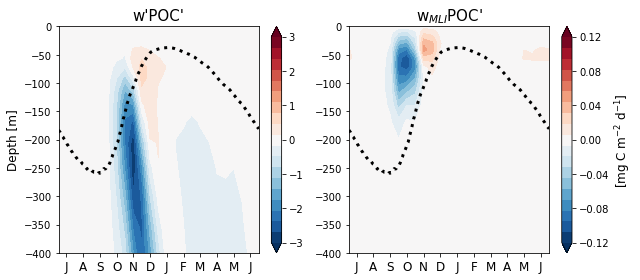

In [102]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,4))
fig.set_tight_layout(True)
im1 = ax1.contourf(range(0,346,15), wpPOCp_d.Zl, wpPOCp_d.roll(day=-12).T*12*86400, 
                  levels=np.linspace(-3.,3.,20), cmap='RdBu_r', extend='both')
ax1.contourf(range(14,360,15), wpPOCp_d.Zl, wpPOCp_d.roll(day=-13).T*12*86400, 
            levels=np.linspace(-3.,3.,20), cmap='RdBu_r', extend='both')
im2 = ax2.contourf(range(0,346,15), wMLIPOCp_d.Zl, wMLIPOCp_d.roll(day=-12).T*12*86400,
                  levels=np.linspace(-.12,.12,20), extend='both', cmap='RdBu_r')
ax2.contourf(range(14,360,15), wMLIPOCp_d.Zl, wMLIPOCp_d.roll(day=-13).T*12*86400,
            levels=np.linspace(-.12,.12,20), extend='both', cmap='RdBu_r')
# im3 = ax3.contourf(range(360), dfz_c.Zl, dfz_c.roll(day=-180).T*1e3*360*86400, 
#                   levels=np.linspace(0,30,10), cmap='Reds', extend='both')
ax1.plot(range(360), -hbl99_day.sel(YC=slice(6e5,14e5)).mean(['YC']).roll(day=-180), 
       ls=':', lw=3, color='k')
ax2.plot(range(360), -hbl99_day.sel(YC=slice(6e5,14e5)).mean(['YC']).roll(day=-180), 
       ls=':', lw=3, color='k')
# ax3.plot(range(360), -hbl99_day.sel(YC=slice(6e5,14e5)).mean(['YC']).roll(day=-180), 
#        ls=':', lw=3, color='k')
ax1.set_title(r"w'POC'", fontsize=15)
ax2.set_title(r"w$_{MLI}$POC'", fontsize=15)
# ax3.set_title(r"F$_{diff}$", fontsize=15)
ax1.set_ylabel(r"Depth [m]", fontsize=12)
ax1.set_xticks(np.linspace(14,344,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax1.set_ylim([-400,0])
ax2.set_xticks(np.linspace(14,344,12))
ax2.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax2.set_ylim([-400,0])
# ax3.set_xticks(np.linspace(14,344,12))
# ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
# ax3.set_ylim([-500,0])
fig.colorbar(im1, ax=ax1, ticks=[-3.,-2,-1,0,1,2,3])
cbar = fig.colorbar(im2, ax=ax2, ticks=[-.12,-.08,-.04,0,.04,.08,.12])
# cbar = fig.colorbar(im3, ax=ax3, ticks=[0,6,12,18,24,30])
# fig.subplots_adjust(right=0.85)
# cbar_ax = fig.add_axes([0.88, 0.16, 0.014, 0.68])
# cbar = fig.colorbar(im3, cax=cbar_ax, ticks=[-10,-8,-6,-4,-2,0,2,4,6,8,10])
cbar.set_label(r'[mg C m$^{-2}$ d$^{-1}$]', fontsize=12)
# plt.savefig(op.join(bdir,'Figures/VerticalPOCflux_20kmMLI-02km.pdf'))

In [43]:
Fe1D.coords['day'] = ('time',np.tile(range(360),dy))
with ProgressBar():
    Fe_c = Fe1D.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','YC','XC']).compute()
Fe_c

[########################################] | 100% Completed |  5min 15.1s


<xarray.DataArray 'TRAC03' (day: 360, Z: 40)>
array([[3.731538e-06, 3.728805e-06, 3.725598e-06, ..., 4.124145e-04,
        4.133141e-04, 4.136568e-04],
       [3.819012e-06, 3.816273e-06, 3.812971e-06, ..., 4.124149e-04,
        4.133144e-04, 4.136592e-04],
       [3.907732e-06, 3.904993e-06, 3.901639e-06, ..., 4.124154e-04,
        4.133144e-04, 4.136617e-04],
       ...,
       [3.489972e-06, 3.487381e-06, 3.484978e-06, ..., 4.123543e-04,
        4.132457e-04, 4.135763e-04],
       [3.572839e-06, 3.570183e-06, 3.567500e-06, ..., 4.123551e-04,
        4.132460e-04, 4.135789e-04],
       [3.656643e-06, 3.653933e-06, 3.650994e-06, ..., 4.123560e-04,
        4.132464e-04, 4.135817e-04]], dtype=float32)
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ...
  * day      (day) int64 0 1 2 3 4 5 6 7 8 

In [109]:
dfz_c_XLD = dfz_c.isel(Zl=nXLD100.sel(YC=slice(6e5,14e5))).mean('YC')
adz_c_XLD = adz_c.isel(Zl=nXLD100.sel(YC=slice(6e5,14e5))).mean('YC')
wpFep_c_XLD = wpFep_d.isel(Zl=nXLD100.sel(YC=slice(6e5,14e5))).mean('YC')
dfz_c_XLD

<xarray.DataArray (day: 360)>
array([1.209176e-14, 1.115434e-15, 1.981183e-15, ..., 5.331017e-13,
       6.199508e-13, 2.606146e-13], dtype=float32)
Coordinates:
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [116]:
dsave = dfz_c_XLD.to_dataset(name='Fdiff_z')
dsave['Fadv_z'] = adz_c_XLD
dsave['wpFep'] = wpFep_c_XLD
dsave.to_netcdf(op.join(bdir,'VerticalIronFluxes_XLD_20kmMLI.nc'))

In [28]:
dsFz = xr.open_dataset(op.join(bdir,'VerticalIronFluxes_XLD_20kmMLI.nc'))
dfz_c_XLD = dsFz.Fdiff_z
wpFep_c_XLD = dsFz.wpFep

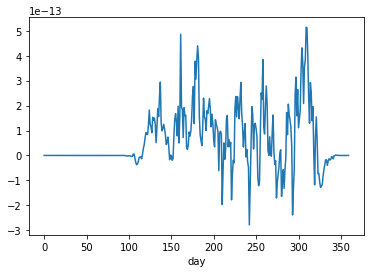

In [34]:
wMLIFep_c_XLD = wMLIFep_d.isel(Zl=nXLD100.sel(YC=slice(6e5,14e5))).mean('YC')
wMLIFep_c_XLD.plot()

(0.0, 14)

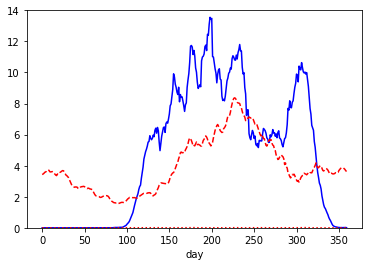

In [51]:
fig, ax = plt.subplots()
# ax2 = ax.twinx()
# (adz_c_100 * dFe_at_zFe.sel(YC=slice(6e5,14e5)).mean('YC')**-1).plot(ax=ax, color='r')
# (dfz_c_100 * dFe_at_zFe.sel(YC=slice(6e5,14e5)).mean('YC')**-1).plot(ax=ax, color='b')
# adz_c_XLD.plot(ax=ax, color='r')
(dfz_c_XLD*1e3*360*86400).plot(ax=ax, color='b')
(wpFep_c_XLD*1e3*360*86400).plot(ax=ax, color='r', ls='--')
(wMLIFep_c_XLD*1e3*360*86400).plot(ax=ax, color='r', ls=':')
ax.set_ylim([0.,14])

In [57]:
ds.Z[:18]

<xarray.DataArray 'Z' (Z: 18)>
array([  -5. ,  -15. ,  -25. ,  -36. ,  -49. ,  -64. ,  -81.5, -102. , -126. ,
       -154. , -187. , -226. , -272. , -327. , -393. , -471.5, -565. , -667.5],
      dtype=float32)
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    drF      (Z) >f4 dask.array<shape=(18,), chunksize=(18,)>
    PHrefC   (Z) >f4 dask.array<shape=(18,), chunksize=(18,)>
Attributes:
    standard_name:  depth
    long_name:      vertical coordinate of cell center
    units:          m
    positive:       down
    axis:           Z

In [ ]:
n500 = 17
diff_M = dfz_c[:,:n500].max()
diff_M

In [31]:
dsmom = open_mdsdataset(op.join(bdir,'20kmMLI_mp113-15_mu15-114_Kp01-018_Ki59-105_Kn015-035_g28-168_mz40_rFe1'), 
                     grid_dir=op.join(pdir,'20km_grid'), iters=range(ts,te,720),
                     prefix=['MOMsnap',
                            ], delta_t=dt
                    )
dsmom

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 50, XG: 50, YC: 100, YG: 100, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 240)
Coordinates:
  * XC       (XC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * XG       (XG) >f4 0.0 20000.0 40000.0 60000.0 80000.0 100000.0 120000.0 ...
  * YG       (YG) >f4 0.0 20000.0 40000.0 60000.0 80000.0 100000.0 120000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu       (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    dxG      (YG, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    dyG      (YC, XG) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    Depth    (YC, XC) >f4 dask

In [83]:
wpbp = xr.open_dataset(op.join(pdir,'APEconversion_20km.nc')).wpbp
# wpbp.coords['days'] = ('time', np.tile(range(24),23))
with ProgressBar():
    wpbp_d = wpbp.sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
wpbp_d

<xarray.DataArray 'wpbp' (days: 24, Zl: 40)>
array([[-4.879377e-10,  4.319233e-10,  7.785458e-10, ...,  3.867451e-10,
         1.908764e-10,  9.985195e-11],
       [-6.167477e-10,  3.777636e-10,  6.748421e-10, ...,  3.720008e-10,
         1.818765e-10,  9.668205e-11],
       [-1.562463e-09,  4.244594e-10,  7.717481e-10, ...,  3.831086e-10,
         1.881052e-10,  1.028213e-10],
       ...,
       [ 2.794379e-10,  9.276243e-10,  1.747867e-09, ...,  3.652191e-10,
         1.806369e-10,  9.523243e-11],
       [-2.077086e-10,  7.304122e-10,  1.359712e-09, ...,  3.674465e-10,
         1.868114e-10,  1.050825e-10],
       [-7.391135e-10,  5.253695e-10,  9.549396e-10, ...,  3.486413e-10,
         1.701086e-10,  8.876732e-11]], dtype=float32)
Coordinates:
  * Zl       (Zl) float32 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 ...
  * days     (days) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


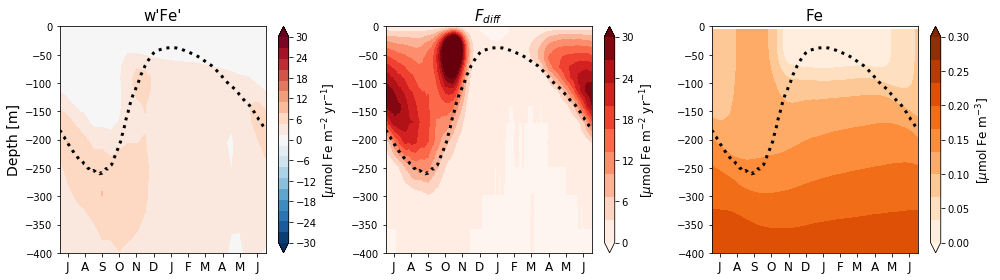

In [65]:
nys, nyn = (6e5,14e5)
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
MXLD = hbl99_day

fig, (ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
fig.set_tight_layout(True)
# im1 = ax1.contourf(np.linspace(0,345,24), wpbp_d.Zl, wpbp_d.T.roll(days=-12)/wpbp_d[:,:n500].max(), 
#                   levels=np.linspace(0.,1.,11), extend='both', cmap='magma')
im2 = ax2.contourf(range(0,346,15), wpFep_d.Zl, wpFep_d.T.roll(day=-12)*1e3*(360*86400), 
                  levels=np.linspace(-30,30,20), 
                   cmap='RdBu_r', extend='both')
ax2.contourf(range(14,360,15), wpFep_d.Zl, wpFep_d.T.roll(day=-13)*1e3*(360*86400), 
            levels=np.linspace(-30,30,20), 
            cmap='RdBu_r', extend='both')
im3 = ax3.contourf(range(360), dfz_c.Zl, dfz_c.T.roll(day=-180)*1e3*(360*86400), 
                  levels=np.linspace(0,30,10), 
                   cmap='Reds', extend='both')
# ax1.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
# ax2.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
# ax3.pcolormesh(range(360), dfz_c.Zl, ((dfz_c-adz_c)/diff_M).T.roll(days=-180), 
#                vmax=1, vmin=-1., cmap='RdBu_r', norm=SymLogNorm(0.01), rasterized=True)
im4 = ax4.contourf(range(360), Fe_c.Z, Fe_c.T.roll(day=-180)*1e3,
                  levels=np.linspace(0,0.3,10), 
                   extend='both', cmap='Oranges')
# ax1.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
#         ls=':', lw=3, color='k')
ax2.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax3.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax4.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
# ax1.set_ylim([-5e2,0])
# ax1.set_xlim([0.,359.])
ax2.set_ylim([-4e2,0])
ax3.set_ylim([-4e2,0])
ax4.set_ylim([-4e2,0])
# ax1.set_title(r"w'b'", fontsize=14)
ax2.set_title(r"w'Fe'", fontsize=15)
ax3.set_title(r"$F_{diff}$", fontsize=15)
ax4.set_title(r"Fe", fontsize=15)
# ax1.set_xticks(np.linspace(14,344,12))
# ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax2.set_xticks(np.linspace(14,344,12))
ax2.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax3.set_xticks(np.linspace(14,344,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax4.set_xticks(np.linspace(14,344,12))
ax4.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax2.set_ylabel(r"Depth [m]", fontsize=14)
# ax2.set_xlabel(r"Month", fontsize=13)
# fig.subplots_adjust(right=0.88)
# cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
# cbar = fig.colorbar(im, cax=cbar_ax)
# fig.colorbar(im1, ax=ax1)
cbar2 = fig.colorbar(im2, ax=ax2, ticks=[-30,-24,-18,-12,-6,0,6,12,18,24,30])
cbar3 = fig.colorbar(im3, ax=ax3, ticks=[0,6,12,18,24,30])
cbar4 = fig.colorbar(im4, ax=ax4, ticks=[0,0.05,0.1,0.15,0.2,0.25,0.3])
cbar2.set_label(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]", fontsize=12)
cbar3.set_label(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]", fontsize=12)
cbar4.set_label(r"[$\mu$mol Fe m$^{-3}$]", fontsize=12)
plt.savefig(op.join(bdir,'Figures/IronFlux-P_dailyclimatology_20kmMLI-02km.pdf'))

In [53]:
# b = grid.diff(ds.PHIHYD,'Z',boundary='fill')/grid.diff(ds.Z,'Z',boundary='fill')
# dbdz = grid.diff(b,'Z',boundary='fill')/grid.diff(ds.Zl,'Z',boundary='fill')
dFedz = grid.diff(Fe1D,'Z',boundary='fill')/grid.diff(ds.Z,'Z',boundary='fill')
# dbdz.coords['days'] = ('time',np.tile(range(360),dy))
dFedz.coords['days'] = ('time',np.tile(range(360),dy))
with ProgressBar():
#     dbdz_d = dbdz.sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
    dFedz_d = dFedz.sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
dFedz_d

[########################################] | 100% Completed | 40.1s


<xarray.DataArray (days: 360, Zl: 40)>
array([[-7.463075e-07,  2.733093e-10,  3.206662e-10, ..., -1.226779e-08,
        -8.735109e-09, -3.326606e-09],
       [-7.638025e-07,  2.739985e-10,  3.301589e-10, ..., -1.227143e-08,
        -8.731890e-09, -3.348905e-09],
       [-7.815462e-07,  2.738568e-10,  3.354331e-10, ..., -1.227517e-08,
        -8.729100e-09, -3.371000e-09],
       ...,
       [-6.979944e-07,  2.590999e-10,  2.403272e-10, ..., -1.226453e-08,
        -8.654427e-09, -3.209602e-09],
       [-7.145678e-07,  2.656211e-10,  2.683086e-10, ..., -1.226849e-08,
        -8.649169e-09, -3.231752e-09],
       [-7.313286e-07,  2.709985e-10,  2.938703e-10, ..., -1.227222e-08,
        -8.644501e-09, -3.255760e-09]], dtype=float32)
Coordinates:
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * days     (days) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [119]:
wp.coords['day'] = ('time',np.tile(range(360),dy))
with ProgressBar():
    Ptot_midd = (P1day + P2day).sel(YC=slice(6e5,14e5)).mean(['YC','XC']).compute()
    w2_sqrt = np.sqrt((wp.sel(YC=slice(6e5,14e5))**2).groupby('day').mean(['time','YC','XC'])).compute()
Ptot_midd

[########################################] | 100% Completed | 18.7s


<xarray.DataArray (days: 360, Z: 40)>
array([[ 6.094559e-03,  6.122628e-03,  6.158390e-03, ..., -7.337287e-08,
        -6.917367e-08, -6.806558e-08],
       [ 5.915963e-03,  5.943350e-03,  5.978477e-03, ..., -7.337940e-08,
        -6.918000e-08, -6.806996e-08],
       [ 5.749239e-03,  5.775990e-03,  5.810508e-03, ..., -7.338592e-08,
        -6.918627e-08, -6.807437e-08],
       ...,
       [ 6.688073e-03,  6.718382e-03,  6.756203e-03, ..., -7.517069e-08,
        -7.126367e-08, -7.024492e-08],
       [ 6.470253e-03,  6.499746e-03,  6.536867e-03, ..., -7.517759e-08,
        -7.127035e-08, -7.025008e-08],
       [ 6.266311e-03,  6.295031e-03,  6.331444e-03, ..., -7.518506e-08,
        -7.127744e-08, -7.025542e-08]], dtype=float32)
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ...
  * days     (d

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


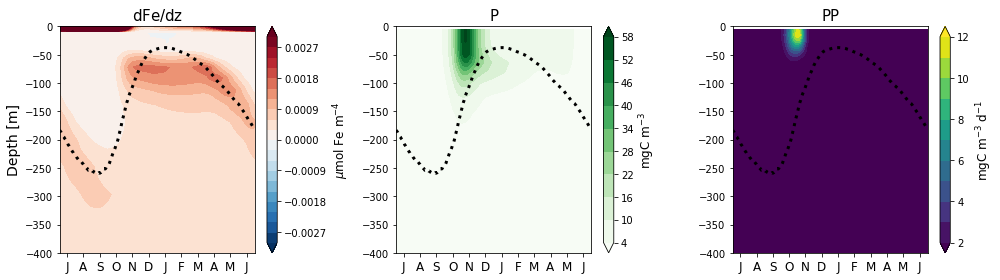

In [55]:
fig, (ax1,ax3,ax4) = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
fig.set_tight_layout(True)
# im1 = ax1.contourf(range(360), w2_sqrt.Zl, w2_sqrt.T.roll(day=-180)*86400, 
#                   levels=np.linspace(1,20.,11), cmap='Reds', extend='both')
# im2 = ax2.contourf(range(360), dbdz_d.Z, dbdz_d.T.roll(days=-180), 
#                   levels=np.linspace(-4e-5,4e-5,21), cmap='RdBu_r', extend='both')
im1 = ax1.contourf(range(360), dFedz_d.Zl, -dFedz_d.T.roll(days=-180)*1e3, 
                  levels=np.linspace(-.003,.003,21), cmap='RdBu_r', extend='both')
im3 = ax3.contourf(range(360), (P1day + P2day).Z, (P1day + P2day).T.roll(days=-180)*106.*12., 
                  levels=np.linspace(4,58,10), cmap='Greens', extend='both')
im4 = ax4.contourf(range(360), PPCday.Z, PPCday.T.roll(days=-180)*86400., 
                  levels=np.arange(2,13,1), extend='both')
# ax1.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
# ax2.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
# ax3.pcolormesh(range(360), dfz_c.Zl, ((dfz_c-adz_c)/diff_M).T.roll(days=-180), 
#                vmax=1, vmin=-1., cmap='RdBu_r', norm=SymLogNorm(0.01), rasterized=True)
ax1.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
# ax2.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
#         ls=':', lw=3, color='k')
ax3.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax4.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax1.set_ylim([-4e2,0])
# ax2.set_ylim([-5e2,0])
ax3.set_ylim([-4e2,0])
ax4.set_ylim([-4e2,0])
# ax2.set_xlim([0,359])
# ax2.set_title(r"db$/$dz", fontsize=14)
ax3.set_title(r"P", fontsize=15)
ax1.set_title(r"dFe$/$dz", fontsize=15)
ax4.set_title(r"PP", fontsize=15)
ax1.set_xticks(np.linspace(14,344,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
# ax2.set_xticks(np.linspace(14,344,12))
# ax2.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax3.set_xticks(np.linspace(14,344,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax4.set_xticks(np.linspace(14,344,12))
ax4.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax1.set_ylabel(r"Depth [m]", fontsize=14)
# ax2.set_xlabel(r"Month", fontsize=13)
# fig.subplots_adjust(right=0.88)
# cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
# cbar = fig.colorbar(im, cax=cbar_ax)
cbar1 = fig.colorbar(im1, ax=ax1)
# fig.colorbar(im2, ax=ax2)
cbar3 = fig.colorbar(im3, ax=ax3)
cbar4 = fig.colorbar(im4, ax=ax4)
cbar4.set_label(r"mgC m$^{-3}$ d$^{-1}$", fontsize=12)
cbar1.set_label(r"$\mu$mol Fe m$^{-4}$", fontsize=12)
cbar3.set_label(r"mgC m$^{-3}$", fontsize=12)
plt.savefig(op.join(bdir,'Figures/Fez-P-PP_dailyclimatology_20kmMLI-02km.pdf'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


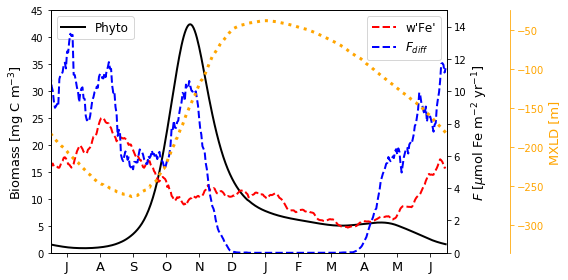

In [125]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']
nys,nyn = 1e3*np.array([600,1400])

fig, ax = plt.subplots(figsize=(8,4))
fig.set_tight_layout(True)
ax2 = ax.twinx()
ax5 = ax.twinx()
# ax7 = ax.twinx()

ax5.spines["right"].set_position(("axes", 1.16))
# ax7.spines["right"].set_position(("axes", 1.29))
# make_patch_spines_invisible(ax7)
# ax7.spines["right"].set_visible(True)


# i = 0
# for y in range(150,50,-25):
#     ax1.plot(range(360), (P1Cday+P2Cday).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i],
#             label=r'%03d-%03dkm' % ((y-25)*1e1,y*1e1))
#     ax1.plot(range(360), ((P1day+P2day)[:,0]*106.*12.).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=1, ls=':', color=colors[i])
#     i += 1
# ax.plot(range(360), P1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'g', lw=2, label=r'P$_1$')
# ax.plot(range(360), P2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'y', lw=2, label=r'P$_2$')
ax.plot(range(360), PtotCday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'k', lw=2, label=r'Phyto')
# ax.plot(range(360), 
#          (P1day+P2day).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180)[:,0]*106.*12., 
#         'g', lw=1.2, ls=':', label=r'P$_{1+2}$ (surf)')
# ax1.plot(range(360), Z1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'r', lw=2, label=r'Z$_1$')
# ax1.plot(range(360), Z2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'm', lw=2, label=r'Z$_2$')
    
# ax1.plot(range(360), (P1Cday+P2Cday+Z1Cday+Z2Cday).isel(YC=slice(50,150)).mean(['YC','XC']).roll(days=-180), 
#         lw=2, color='k', label='mean')
im5, = ax5.plot(range(360), -hbl99_day.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
              ls=':', lw=3, color='orange')
ax2.plot(range(360), wpFep_c_XLD.roll(day=-180)*(360*86400)*1e3, 
        ls='--', lw=2, color='r', label=r"w'Fe'")
ax2.plot(range(360), dfz_c_XLD.roll(day=-180)*(360*86400)*1e3, 
        ls='--', lw=2, color='b', label=r"$F_{diff}$")


# ax5.spines["right"].set_edgecolor(im2.get_color())
ax5.spines["right"].set_edgecolor(im5.get_color())
# ax7.spines["right"].set_edgecolor(im7.get_color())

ax5.tick_params(axis='y', colors=im5.get_color())
# ax7.tick_params(axis='y', colors=im7.get_color())

ax.set_xticks(np.linspace(15,345,12))
ax.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax.set_ylim([0.,45.])
ax.set_xlim([0.,360])
ax2.set_ylim([0,1.5e1])
# ax7.set_ylim([0.,.5])
# ax1.set_xlabel(r'Month', fontsize=13)
ax5.set_ylabel('MXLD [m]', color='orange', fontsize=13)
ax5.tick_params('y', colors='orange')
ax5.set_ylim([-335,-25])
# ax.set_title(r"Biomass", fontsize=15)
ax.set_ylabel(r'Biomass [mg C m$^{-3}$]', fontsize=13)
ax.legend(loc='upper left', fontsize=12)
ax2.set_ylabel('$F$ [$\mu$mol Fe m$^{-2}$ yr$^{-1}$]', fontsize=13)
ax2.legend(loc='upper right', fontsize=12)
# ax2.tick_params('y', colors='r')
# ax7.set_ylabel('$\partial_z F_{diff}|_{z=100m}$ [mmol Fe m$^{-3}$ s$^{-1}$]', color='b', fontsize=13)
# ax7.tick_params('y', colors='b')

plt.savefig(op.join(pdir,'Figures/Biomass_Fadv-Fdiff_20kmMLI.pdf'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


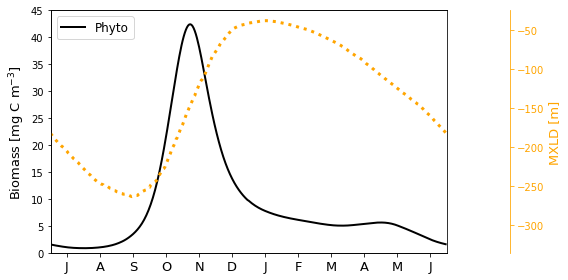

In [57]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']
nys,nyn = 1e3*np.array([600,1400])

fig, ax = plt.subplots(figsize=(8,4))
fig.set_tight_layout(True)
# ax2 = ax.twinx()
ax5 = ax.twinx()
# ax7 = ax.twinx()

ax5.spines["right"].set_position(("axes", 1.16))
# ax7.spines["right"].set_position(("axes", 1.29))
# make_patch_spines_invisible(ax7)
# ax7.spines["right"].set_visible(True)


# i = 0
# for y in range(150,50,-25):
#     ax1.plot(range(360), (P1Cday+P2Cday).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i],
#             label=r'%03d-%03dkm' % ((y-25)*1e1,y*1e1))
#     ax1.plot(range(360), ((P1day+P2day)[:,0]*106.*12.).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=1, ls=':', color=colors[i])
#     i += 1
# ax.plot(range(360), P1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'g', lw=2, label=r'P$_1$')
# ax.plot(range(360), P2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'y', lw=2, label=r'P$_2$')
ax.plot(range(360), PtotCday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'k', lw=2, label=r'Phyto')
# ax.plot(range(360), 
#          (P1day+P2day).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180)[:,0]*106.*12., 
#         'g', lw=1.2, ls=':', label=r'P$_{1+2}$ (surf)')
# ax1.plot(range(360), Z1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'r', lw=2, label=r'Z$_1$')
# ax1.plot(range(360), Z2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'm', lw=2, label=r'Z$_2$')
    
# ax1.plot(range(360), (P1Cday+P2Cday+Z1Cday+Z2Cday).isel(YC=slice(50,150)).mean(['YC','XC']).roll(days=-180), 
#         lw=2, color='k', label='mean')
im5, = ax5.plot(range(360), -hbl99_day.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
              ls=':', lw=3, color='orange')
# ax2.plot(range(360), adz_c_100.roll(days=-180)*1e3, 
#         ls='--', lw=2, color='r', label=r"$F_{adv}$")
# ax2.plot(range(360), dfz_c_100.roll(days=-180)*1e3, 
#         ls='--', lw=2, color='b', label=r"$F_{diff}$")


# ax5.spines["right"].set_edgecolor(im2.get_color())
ax5.spines["right"].set_edgecolor(im5.get_color())
# ax7.spines["right"].set_edgecolor(im7.get_color())

ax5.tick_params(axis='y', colors=im5.get_color())
# ax7.tick_params(axis='y', colors=im7.get_color())

ax.set_xticks(np.linspace(15,345,12))
ax.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax.set_ylim([0.,45.])
ax.set_xlim([0.,360])
# ax2.set_ylim([0,15e-8])
# ax7.set_ylim([0.,.5])
# ax1.set_xlabel(r'Month', fontsize=13)
ax5.set_ylabel('MXLD [m]', color='orange', fontsize=13)
ax5.tick_params('y', colors='orange')
ax5.set_ylim([-335,-25])
# ax.set_title(r"Biomass", fontsize=15)
ax.set_ylabel(r'Biomass [mg C m$^{-3}$]', fontsize=13)
ax.legend(loc='upper left', fontsize=12)
# ax2.set_ylabel('$F|_{z=100m}$ [$\mu$mol Fe m$^{-3}$ s$^{-1}$]', fontsize=13)
# ax2.legend(loc='upper right', fontsize=12)
# ax2.tick_params('y', colors='r')
# ax7.set_ylabel('$\partial_z F_{diff}|_{z=100m}$ [mmol Fe m$^{-3}$ s$^{-1}$]', color='b', fontsize=13)
# ax7.tick_params('y', colors='b')

plt.savefig(op.join(pdir,'Figures/Biomass_20kmMLI.pdf'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


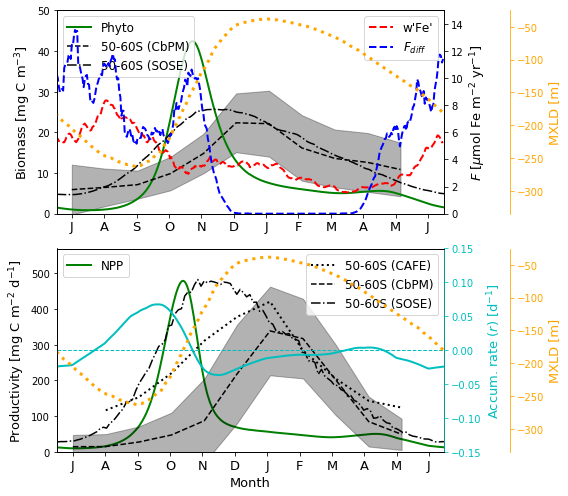

In [124]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']
nys,nyn = 1e3*np.array([600,1400])

fig, (ax1,ax3) = plt.subplots(nrows=2, ncols=1, figsize=(8,7))
fig.set_tight_layout(True)
ax2 = ax1.twinx()
ax5 = ax1.twinx()
ax7 = ax3.twinx()
ax4 = ax3.twinx()
ax6 = ax3.twinx()
# ax7 = ax3.twinx()
ax5.spines["right"].set_position(("axes", 1.17))
ax6.spines["right"].set_position(("axes", 1.17))
# make_patch_spines_invisible(ax7)
# ax7.spines["right"].set_visible(True)

ax2.plot(range(360), wpFep_c_XLD.roll(day=-180)*(360*86400)*1e3, 
        ls='--', lw=2, color='r', label=r"w'Fe'")
ax2.plot(range(360), dfz_c_XLD.roll(day=-180)*(360*86400)*1e3, 
        ls='--', lw=2, color='b', label=r"$F_{diff}$")
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-52,-56)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'52-56S (CbPM)', ls='--', lw=2, color=colors[1])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-56,-60)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'56-60S (CbPM)', ls='--', lw=2, color=colors[2])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-60,-64)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'60-64S (CbPM)', ls='--', lw=2, color=colors[3])

# i = 0
# for y in range(150,50,-25):
#     ax1.plot(range(360), (P1Cday+P2Cday).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i],
#             label=r'%03d-%03dkm' % ((y-25)*1e1,y*1e1))
#     ax1.plot(range(360), ((P1day+P2day)[:,0]*106.*12.).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=1, ls=':', color=colors[i])
#     i += 1
# ax1.plot(range(360), P1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'g', lw=2, label=r'P$_1$')
# ax1.plot(range(360), P2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'y', lw=2, label=r'P$_2$')
ax1.plot(range(360), PtotCday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'g', lw=2, label=r'Phyto')
ax1.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-50,-60)).mean(['lat','lon']).roll(months=-6), 
        label=r'50-60S (CbPM)', ls='--', color='k')
ax1.fill_between(np.linspace(15,350,12), 
                ((c_ker_mon-c_ker_std).sel(lat=slice(-50,-60)).mean(['lat','lon'])).roll(months=-6), 
                ((c_ker_mon+c_ker_std).sel(lat=slice(-50,-60)).mean(['lat','lon'])).roll(months=-6), 
                color='k', alpha=0.3)
# ax1.plot(range(360), 
#          (P1day+P2day).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180)[:,0]*106.*12., 
#         'g', lw=1.2, ls=':', label=r'P$_{1+2}$ (surf)')
# ax1.plot(range(360), Z1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'r', lw=2, label=r'Z$_1$')
# ax1.plot(range(360), Z2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'm', lw=2, label=r'Z$_2$')
    
# ax1.plot(range(360), (P1Cday+P2Cday+Z1Cday+Z2Cday).isel(YC=slice(50,150)).mean(['YC','XC']).roll(days=-180), 
#         lw=2, color='k', label='mean')
im5, = ax5.plot(range(360), -hbl99_day.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
              ls=':', lw=3, color='orange')

ax1.plot(np.linspace(1,363,len(P_kersurf.DinY)), 
        (P_kersurf.roll(DinY=-60)*1e3*12.).sel(iLAT=slice(-60,-50)).mean(['iLAT','iLON']), 
        'k-.', label='50-60S (SOSE)')

ax1.set_xticks(np.linspace(15,345,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax1.set_ylim([0.,50.])
ax1.set_xlim([1.,360])
ax2.set_ylim([0,1.5e1])
# ax1.set_xlabel(r'Month', fontsize=13)
ax5.set_ylabel('MXLD [m]', color='orange', fontsize=13)
ax5.tick_params('y', colors='orange')
ax5.set_ylim([-335,-25])
# ax1.set_title(r"Biomass", fontsize=15)
ax1.set_ylabel(r'Biomass [mg C m$^{-3}$]', fontsize=13)
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)
ax2.set_ylabel('$F$ [$\mu$mol Fe m$^{-2}$ yr$^{-1}$]', fontsize=13)
ax2.legend(loc='upper right', fontsize=12)


ax7.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-50,-60)).carbon.mean(['lat','lon']).roll(month=-6), 
        label=r'50-60S (CAFE)', ls=':', lw=2, color='k')
ax7.plot(np.linspace(15,350,12), cbpm_ker_mon.sel(lat=slice(-50,-60)).mean(['lat','lon']).roll(months=-6), 
        label=r'50-60S (CbPM)', ls='--', color='k')
ax7.fill_between(np.linspace(15,350,12), 
                ((cbpm_ker_mon-cbpm_ker_std).sel(lat=slice(-50,-60)).mean(['lat','lon'])).roll(months=-6), 
                ((cbpm_ker_mon+cbpm_ker_std).sel(lat=slice(-50,-60)).mean(['lat','lon'])).roll(months=-6), 
                color='k', alpha=0.3)
ax7.plot(np.linspace(1,363,len(PP_kersurf.DinY)), 
        (PP_kersurf.roll(DinY=-60)*1e3*12.*86400).sel(iLAT=slice(-60,-50)).mean(['iLAT','iLON']), 
        'k-.', label='50-60S (SOSE)')
# ax7.plot(range(360), (adz_c_100.roll(days=-180) * dFe_at_zFe.sel(YC=slice(6e5,14e5)).mean('YC')**-1)*(360*86400), 
#         ls='--', lw=2, color='r', label=r"$F_{adv}$")
# ax7.plot(range(360), (dfz_c_100.roll(days=-180) * dFe_at_zFe.sel(YC=slice(6e5,14e5)).mean('YC')**-1)*(360*86400), 
#         ls='--', lw=2, color='b', label=r"$F_{diff}$")
# ax4.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-52,-56)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'52-56S (CAFE)', ls='--', lw=2, color=colors[1])
# ax4.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-56,-60)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'56-60S (CAFE)', ls='--', lw=2, color=colors[2])
# ax4.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-60,-64)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'60-64S (CAFE)', ls='--', lw=2, color=colors[3])

# i = 0
# for y in range(150,50,-25):
#     ax3.plot(range(360), (PPintg*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i])
#     i += 1
ax3.plot(range(360), (PPintg*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        lw=2, color='g', label=r'NPP')
im4, = ax4.plot(range(360), (rday*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
              lw=2, color='c')
ax4.plot(range(360), np.zeros(360), ls='--',
        lw=1, color='c')
im6, = ax6.plot(range(360), -hbl99_day.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
              ls=':', lw=3, color='orange')

ax5.spines["right"].set_edgecolor(im5.get_color())
ax4.spines["right"].set_edgecolor(im4.get_color())
ax6.spines["right"].set_edgecolor(im6.get_color())
# ax3.plot(range(360), -(lday*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         lw=2, color='r', label=r'$l$')
ax5.tick_params(axis='y', colors=im5.get_color())
ax4.tick_params(axis='y', colors=im4.get_color())
ax6.tick_params(axis='y', colors=im6.get_color())

ax3.set_xticks(np.linspace(15,345,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax3.set_ylim([0.,570])
ax7.set_ylim([0.,570])
ax3.set_xlim([0.,359])
# ax4.set_ylim([-5e2,5e2])
# ax4.set_yticks([])
ax3.set_xlabel(r'Month', fontsize=13)
# ax3.legend(loc='upper right', fontsize=12)
ax7.legend(loc='upper right', fontsize=12)
ax7.set_yticks([])
ax4.set_ylabel('Accum. rate ($r$) [d$^{-1}$]', color='c', fontsize=13)
ax4.tick_params('y', colors='c')
ax4.set_ylim([-0.15,0.15])
ax6.set_ylabel('MXLD [m]', color='orange', fontsize=13)
ax6.tick_params('y', colors='orange')
ax6.set_ylim([-335,-25])
# ax3.set_title(r"Productivity", fontsize=15)
ax3.set_ylabel(r'Productivity [mg C m$^{-2}$ d$^{-1}$]', fontsize=13)
ax3.legend(loc='upper left', fontsize=12)
# ax4.legend(loc='upper right', fontsize=12)
plt.savefig(op.join(pdir,'Figures/Biomass_CompareWithObs_20kmMLI.pdf'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


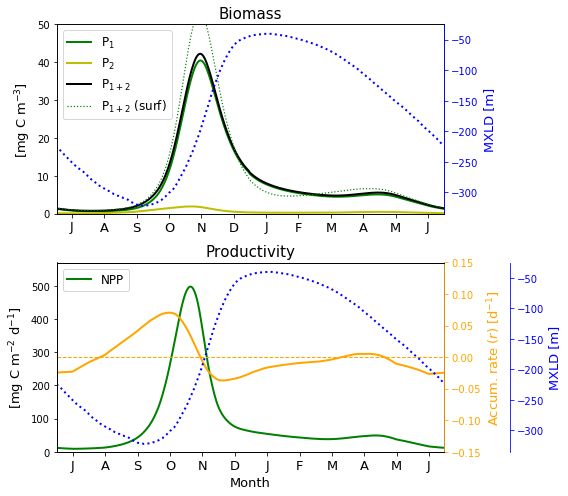

In [32]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']
nys,nyn = 1e3*np.array([600,1400])

fig, (ax1,ax3) = plt.subplots(nrows=2, ncols=1, figsize=(8,7))
fig.set_tight_layout(True)
# ax2 = ax1.twinx()
ax5 = ax1.twinx()
# ax7 = ax3.twinx()
ax4 = ax3.twinx()
ax6 = ax3.twinx()
# ax7 = ax3.twinx()
ax6.spines["right"].set_position(("axes", 1.17))
# make_patch_spines_invisible(ax7)
# ax7.spines["right"].set_visible(True)

ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-50,-60)).mean(['lat','lon']).roll(months=-6), 
        label=r'50-60S (CbPM)', ls='--', color='k')
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-52,-56)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'52-56S (CbPM)', ls='--', lw=2, color=colors[1])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-56,-60)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'56-60S (CbPM)', ls='--', lw=2, color=colors[2])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-60,-64)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'60-64S (CbPM)', ls='--', lw=2, color=colors[3])

# i = 0
# for y in range(150,50,-25):
#     ax1.plot(range(360), (P1Cday+P2Cday).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i],
#             label=r'%03d-%03dkm' % ((y-25)*1e1,y*1e1))
#     ax1.plot(range(360), ((P1day+P2day)[:,0]*106.*12.).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=1, ls=':', color=colors[i])
#     i += 1
ax1.plot(range(360), P1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'g', lw=2, label=r'P$_1$')
ax1.plot(range(360), P2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'y', lw=2, label=r'P$_2$')
ax1.plot(range(360), Ptot.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'k', lw=2, label=r'P$_{1+2}$')
ax1.plot(range(360), 
         (P1day+P2day).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180)[:,0]*106.*12., 
        'g', lw=1.2, ls=':', label=r'P$_{1+2}$ (surf)')
# ax1.plot(range(360), Z1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'r', lw=2, label=r'Z$_1$')
# ax1.plot(range(360), Z2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'm', lw=2, label=r'Z$_2$')
    
# ax1.plot(range(360), (P1Cday+P2Cday+Z1Cday+Z2Cday).isel(YC=slice(50,150)).mean(['YC','XC']).roll(days=-180), 
#         lw=2, color='k', label='mean')
im5, = ax5.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
              ls=':', lw=2, color='b')

# ax2.plot(np.linspace(1,363,len(P_kersurf.DinY)), 
#         (P_kersurf.roll(DinY=-60)*1e3*12.).sel(iLAT=slice(-60,-50)).mean(['iLAT','iLON']), 
#         'k-.', label='50-60S (SOSE)')

ax1.set_xticks(np.linspace(15,345,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax1.set_ylim([0.,50.])
ax1.set_xlim([1.,360])
ax2.set_ylim([0.,50.])
ax2.set_yticks([])
# ax1.set_xlabel(r'Month', fontsize=13)
ax5.set_ylabel('MXLD [m]', color='b', fontsize=13)
ax5.tick_params('y', colors='b')
ax5.set_ylim([-335,-25])
ax1.set_title(r"Biomass", fontsize=15)
ax1.set_ylabel(r'[mg C m$^{-3}$]', fontsize=13)
ax1.legend(loc='upper left', fontsize=12)
# ax2.legend(loc='upper right', fontsize=12)


# ax7.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-50,-60)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'50-60S (CAFE)', ls=':', lw=2, color='k')
# ax7.plot(np.linspace(15,350,12), cbpm_ker_mon.sel(lat=slice(-50,-60)).mean(['lat','lon']).roll(months=-6), 
#         label=r'50-60S (CbPM)', ls='--', color='k')
# ax7.plot(np.linspace(1,363,len(PP_kersurf.DinY)), 
#         (PP_kersurf.roll(DinY=-60)*1e3*12.*86400).sel(iLAT=slice(-60,-50)).mean(['iLAT','iLON']), 
#         'k-.', label='50-60S (SOSE)')
# ax4.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-52,-56)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'52-56S (CAFE)', ls='--', lw=2, color=colors[1])
# ax4.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-56,-60)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'56-60S (CAFE)', ls='--', lw=2, color=colors[2])
# ax4.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-60,-64)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'60-64S (CAFE)', ls='--', lw=2, color=colors[3])

# i = 0
# for y in range(150,50,-25):
#     ax3.plot(range(360), (PPintg*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i])
#     i += 1
ax3.plot(range(360), (PPintg*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        lw=2, color='g', label=r'NPP')
im4, = ax4.plot(range(360), (rday*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
              lw=2, color='orange')
ax4.plot(range(360), np.zeros(360), ls='--',
        lw=1, color='orange')
im6, = ax6.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
              ls=':', lw=2, color='b')

ax5.spines["right"].set_edgecolor(im5.get_color())
ax4.spines["right"].set_edgecolor(im4.get_color())
ax6.spines["right"].set_edgecolor(im6.get_color())
# ax3.plot(range(360), -(lday*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         lw=2, color='r', label=r'$l$')
ax5.tick_params(axis='y', colors=im5.get_color())
ax4.tick_params(axis='y', colors=im4.get_color())
ax6.tick_params(axis='y', colors=im6.get_color())

ax3.set_xticks(np.linspace(15,345,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax3.set_ylim([0.,570])
# ax7.set_ylim([0.,570])
ax3.set_xlim([0.,359])
# ax4.set_ylim([-5e2,5e2])
# ax4.set_yticks([])
ax3.set_xlabel(r'Month', fontsize=13)
# ax3.legend(loc='upper right', fontsize=12)
# ax7.legend(loc='upper right', fontsize=12)
# ax7.set_yticks([])
ax4.set_ylabel('Accum. rate ($r$) [d$^{-1}$]', color='orange', fontsize=13)
ax4.tick_params('y', colors='orange')
ax4.set_ylim([-0.15,0.15])
ax6.set_ylabel('MXLD [m]', color='b', fontsize=13)
ax6.tick_params('y', colors='b')
ax6.set_ylim([-335,-25])
ax3.set_title(r"Productivity", fontsize=15)
ax3.set_ylabel(r'[mg C m$^{-2}$ d$^{-1}$]', fontsize=13)
ax3.legend(loc='upper left', fontsize=12)
# ax4.legend(loc='upper right', fontsize=12)
plt.savefig(op.join(pdir,'Figures/Biomass_CompareWoutObs_20km.pdf'))

In [62]:
Ptot.mean(['YC','XC']).sum('days').values

array(3189.29345703)

In [70]:
with ProgressBar():
    Pk = xrft.power_spectrum((P1+P2)[:,0], dim=['XC'], detrend='constant').compute()
Pk

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


/home/takaya/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:


[########################################] | 100% Completed | 58.1s


<xarray.DataArray 'rechunk-merge-8785d84aa0a50638c562a97e8cefde96' (time: 4320, YC: 100, freq_XC: 50)>
array([[[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [1.275950e+00, 1.345682e+00, ..., 1.709152e+00, 1.345682e+00],
        ...,
        [6.144149e-01, 4.649278e-01, ..., 2.098586e-01, 4.649278e-01],
        [2.797595e-01, 2.359185e-01, ..., 2.351207e-01, 2.359185e-01]],

       [[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [5.046055e-01, 4.986948e-01, ..., 5.687512e-01, 4.986948e-01],
        ...,
        [8.565750e-01, 5.492461e-01, ..., 3.302263e-01, 5.492461e-01],
        [2.722564e-01, 2.338545e-01, ..., 2.862984e-01, 2.338545e-01]],

       ...,

       [[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [7.350257e-03, 9.773252e-04, ..., 6.908899e-03, 9.773252e-04],
        ...,
        [4.736460e-05, 6.063112e-03, ..., 2.693752e-03, 6.063112e-03],
        [2.376888e-04, 1.451523e-04, ..., 4.309708e-04, 1.45

In [71]:
Pk.coords['seas'] = ('time',np.tile(np.repeat(range(4),90),dy))
with ProgressBar():
    Pk_seas = Pk.sel(YC=slice(6e5,14e5)).groupby('seas').mean(['time','YC']).compute()
Pk_seas

<xarray.DataArray 'rechunk-merge-8785d84aa0a50638c562a97e8cefde96' (seas: 4, freq_XC: 50)>
array([[5.620764e-06, 6.036975e-06, 6.595243e-06, 7.885948e-06, 9.730182e-06,
        1.286598e-05, 1.738434e-05, 2.445819e-05, 3.541265e-05, 5.350567e-05,
        8.276107e-05, 1.290614e-04, 2.008929e-04, 3.238013e-04, 5.238507e-04,
        8.205097e-04, 1.257712e-03, 2.075691e-03, 3.229353e-03, 4.937427e-03,
        7.671863e-03, 1.294158e-02, 2.023409e-02, 2.677837e-02, 4.968568e-02,
        6.265206e-14, 4.968568e-02, 2.677837e-02, 2.023409e-02, 1.294158e-02,
        7.671863e-03, 4.937427e-03, 3.229353e-03, 2.075691e-03, 1.257712e-03,
        8.205097e-04, 5.238507e-04, 3.238013e-04, 2.008929e-04, 1.290614e-04,
        8.276107e-05, 5.350567e-05, 3.541265e-05, 2.445819e-05, 1.738434e-05,
        1.286598e-05, 9.730182e-06, 7.885948e-06, 6.595243e-06, 6.036975e-06],
       [8.446546e-06, 8.686975e-06, 9.914042e-06, 1.217096e-05, 1.559818e-05,
        2.137150e-05, 2.996968e-05, 4.469657e-05, 

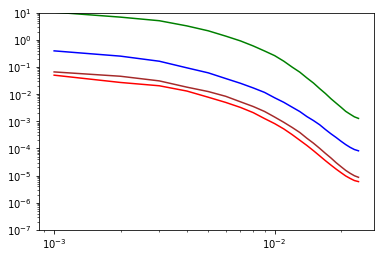

In [258]:
fig, ax = plt.subplots()
ax.plot(Pk_seas.freq_XC[26:]*1e3, Pk_seas[0,26:], 'r')
ax.plot(Pk_seas.freq_XC[26:]*1e3, Pk_seas[1,26:], 'brown')
ax.plot(Pk_seas.freq_XC[26:]*1e3, Pk_seas[2,26:], 'b')
ax.plot(Pk_seas.freq_XC[26:]*1e3, Pk_seas[3,26:], 'g')
ax.set_ylim([1e-7,1e1])
ax.set_xscale('log')
ax.set_yscale('log')

# Eddy iron fluxes

In [41]:
diff = ds.DFrITr03
# with ProgressBar():
#     diff_mn = (diff*ds.rA**-1*(360*86400)*1e3).mean(['time','XC']).compute()
# diff_mn

In [140]:
ds.DFrITr03.attrs

OrderedDict([('standard_name', 'DFrITr03'),
             ('long_name', 'Vertical Diffusive Flux of FeT (Implicit part)'),
             ('units', 'mM/m^3 .m^3/s')])

In [44]:
with ProgressBar():
    ds_clim = ds.mean(['time','XC','XG']).load()

[########################################] | 100% Completed |  6min  9.3s


In [45]:
T_clim = ds_clim.THETA
vb = ds_clim.VVEL
wb = ds_clim.WVEL
Feb = ds_clim.TRAC03
vFeb = ds_clim.VTRAC03
wFeb = ds_clim.WTRAC03
FadvV = ds_clim.ADVyTr03
FadvW = ds_clim.ADVrTr03
kppb = ds_clim.KPPgTr03
dfib = ds_clim.DFrITr03
bgcb = ds_clim.FeTbgc

In [46]:
vbFeb = grid.interp(vb,'Y',boundary='fill')*Feb
wbFeb = grid.interp(wb,'Z',boundary='fill')*Feb
vpFep_b = grid.interp(vFeb,'Y',boundary='fill') - vbFeb
wpFep_b = wFeb - wbFeb

print(vpFep_b, wpFep_b)

<xarray.DataArray (Z: 40, YC: 100)>
array([[ 0.000000e+00,  2.982032e-08,  9.016039e-08, ..., -7.853145e-08,
        -5.195501e-08, -1.796187e-08],
       [ 0.000000e+00,  2.607079e-08,  8.402918e-08, ..., -5.773528e-08,
        -5.171148e-08, -2.205373e-08],
       [ 0.000000e+00,  2.294216e-08,  7.850490e-08, ..., -4.197389e-08,
        -4.133660e-08, -1.723230e-08],
       ...,
       [ 0.000000e+00,  3.384095e-10,  1.457507e-09, ...,  1.431723e-08,
         4.582315e-09,  6.670214e-10],
       [ 0.000000e+00,  7.002574e-10,  2.735397e-09, ...,  1.617433e-08,
         5.200377e-09,  7.774233e-10],
       [ 0.000000e+00,  1.149964e-09,  4.462619e-09, ...,  2.202596e-08,
         7.468042e-09,  1.154032e-09]], dtype=float32)
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z)

In [47]:
fe_intrp = grid.interp(Feb, 'Y', boundary='fill')
temp = (vb * fe_intrp).compute()
temp = vFeb - temp
advpfep_bar = grid.diff(temp*ds.dxG.mean('XC'),'Y',
                        boundary='fill') * ds.rA.mean('XC')**-1

fe_intrp = grid.interp(Feb, 'Z', boundary='fill')
temp = (wb * fe_intrp).compute()
temp = grid.interp(wFeb,'Z',boundary='fill') - temp
adwpfep_bar = grid.diff(temp,'Z',boundary='fill') * ds.drF**-1

advpp_b = -(-adwpfep_bar + advpfep_bar)
advpp_b

<xarray.DataArray (Z: 40, YC: 100)>
dask.array<shape=(40, 100), dtype=float32, chunksize=(40, 99)>
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ...

In [48]:
# MLDb = xr.open_dataset(op.join(pdir,'KPPMLD_20km.nc')).mld.mean(['time','XC'])
MXLDb = xr.open_dataset(op.join(pdir,'KPPhbl_99percentile_20kmMLI.nc')).hbl99.mean(['time'])

NameError: name 'diff_mn' is not defined

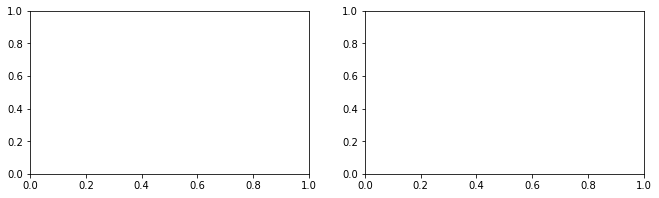

In [128]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(11,3))
# fig.set_tight_layout(True)
im = ax1.pcolormesh(diff.YC*1e-3, diff.Zl, diff_mn,
                   vmin=1e-1, vmax=1e1, cmap='RdBu_r', norm=colors.LogNorm(),
                   rasterized=True)
ax2.pcolormesh(wpFep_b.YC*1e-3, wpFep_b.Z, wpFep_b*(360*86400)*1e3,
              vmin=1e-1, vmax=1e1, cmap='RdBu_r', norm=colors.LogNorm(),
              rasterized=True)
ax1.set_ylim([-5e2,0.])
ax2.set_ylim([-5e2,0.])
ax1.set_xlabel(r"Y [km]")
ax1.set_ylabel(r"Depth [m]")
ax2.set_xlabel(r"Y [km]")
ax1.set_title(r"$\overline{F}_{diff}$", fontsize=14)
ax2.set_title(r"$\overline{w' Fe'}$", fontsize=14)
fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.15, 0.012, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]")
plt.savefig(op.join(pdir, 'Figures/VertDiff_wFe_Fe_20km.pdf'))

In [49]:
Fe = ds.TRAC03
with ProgressBar():
    dFedz = (grid.diff(Fe.mean('XC'),'Z',boundary='fill')/grid.diff(Fe.Z,'Z',boundary='fill')).compute()
    dFe = (grid.diff(Fe.mean('XC'),'Z',boundary='fill')).mean('time').compute()

[########################################] | 100% Completed | 27.7s
[########################################] | 100% Completed | 28.6s


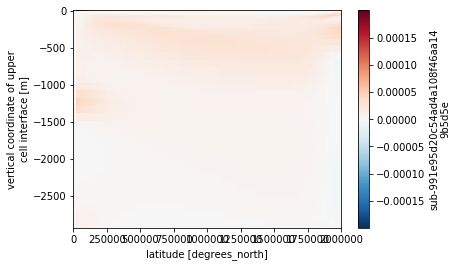

In [154]:
dFe.plot()

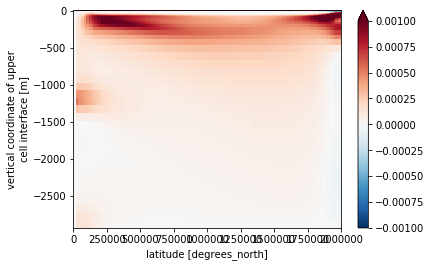

In [76]:
(-dFedz*1e3).mean(['time']).plot(vmax=1e-3)

In [50]:
# nFez_clim = np.argmax(-dFedz[:,:],axis=1)
nFez_clim = np.argmax(-dFedz.mean('time')[1:], axis=0)
# nFe_clim = np.argmax(dFe[1:], axis=0)
# nFez_clim+9

N = nFez_clim.shape
zFe_clim = np.zeros(nFez_clim.shape)
dFe_at_zFe = np.zeros(nFez_clim.shape)
for i in range(N[0]):
    zFe_clim[i] = ds.Zl[int(nFez_clim[i]+1)]
    dFe_at_zFe[i] = dFe[:,i][int(nFez_clim[i]+1)]
#     print(dFe[:,i][int(nFez_clim[i]+1)].values)
#     for j in range(N[1]):
#         zFe_clim[i,j] = ds.Zl[int(nFez_clim[i,j])]
        
zFe_clim = xr.DataArray(zFe_clim, dims=nFez_clim.dims, coords=nFez_clim.coords)
dFe_at_zFe = xr.DataArray(dFe_at_zFe, dims=nFez_clim.dims, coords=nFez_clim.coords)
print(dFe_at_zFe, zFe_clim)

<xarray.DataArray (YC: 100)>
array([0.000000e+00, 2.871130e-05, 3.926705e-06, 6.033951e-06, 1.097986e-05,
       1.331633e-05, 1.889948e-05, 2.212153e-05, 2.432937e-05, 2.566438e-05,
       2.704604e-05, 2.796418e-05, 2.853827e-05, 2.891388e-05, 2.933114e-05,
       2.983991e-05, 3.015927e-05, 3.010536e-05, 3.003311e-05, 2.976799e-05,
       2.950854e-05, 2.910550e-05, 2.899329e-05, 2.884323e-05, 2.845859e-05,
       2.820168e-05, 2.770620e-05, 2.727963e-05, 2.673766e-05, 2.627155e-05,
       2.578938e-05, 2.540253e-05, 2.475473e-05, 2.413021e-05, 2.341283e-05,
       2.269155e-05, 2.197570e-05, 2.125836e-05, 2.058079e-05, 1.998858e-05,
       2.292541e-05, 2.256327e-05, 2.214934e-05, 2.163398e-05, 2.117538e-05,
       2.071360e-05, 2.026349e-05, 1.989364e-05, 1.953270e-05, 1.918341e-05,
       1.881604e-05, 1.838881e-05, 1.791052e-05, 1.751692e-05, 1.701798e-05,
       1.661259e-05, 1.629311e-05, 1.600147e-05, 1.572638e-05, 1.551258e-05,
       1.531618e-05, 1.519761e-05, 1.498770e-05

In [53]:
diff_z = grid.diff(diff, 'Z', boundary='fill')/(ds.rA)
with ProgressBar():
    dff_z_clim = diff_z[:].mean(['time','XC']).compute()

[########################################] | 100% Completed | 36.9s


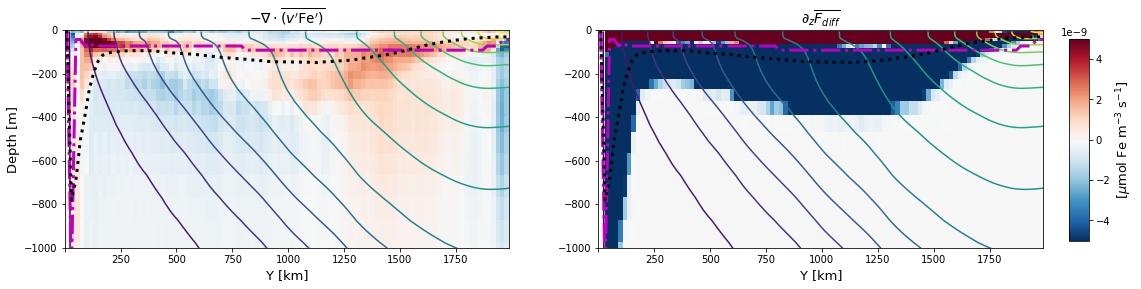

In [54]:
Tlevs = np.arange(-1.,8.5,.5) + 0.
yst = 2
dny = 4
dnz = 2
yy, zz = np.meshgrid(ds.YC.data[yst::dny], ds.Z.data[::dnz])
N = wpFep_b.data[::dnz,yst::dny].shape

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,4))
# fig.set_tight_layout(True)
im = ax1.pcolormesh(T_clim.YC, T_clim.Z, advpp_b*1e3, 
                   vmin=-5e-9, vmax=5e-9, cmap='RdBu_r',
                   rasterized=True)
# ax1.plot(MLDb.YC, -MLDb, 'k', lw=2)
ax1.plot(zFe_clim.YC, zFe_clim, ls='-.', color='m', lw=3)
ax1.plot(MXLDb.YC, -MXLDb, ls=':', color='k', lw=3)
# ax.plot(zFe_clim.YC, zFe_clim.mean('time'), 'k-.', lw=2)
ax1.contour(T_clim.YC, T_clim.Z, T_clim, levels=Tlevs)
#            , cmap='RdBu_r')
# ax1.quiver(yy, zz, (vpFep_b/Feb)[::dnz,yst::dny], 
#           np.ones((N[0],N[1]))*(wpFep_b/Feb)[::dnz,yst::dny], 
#           pivot='mid', angles='xy')
#           , scale_units='xy', scale=1.)
ax1.set_xticks(np.arange(0.,2e6,2.5e5))
ax1.set_xticklabels(['','250','500','750','1000','1250','1500','1750'])
ax1.set_xlabel('Y [km]', fontsize=13)
ax1.set_ylabel('Depth [m]', fontsize=13)
ax1.set_ylim([-1000,0.])
ax1.set_title(r"$-\nabla\cdot\overline{(v'{\tt Fe'})}$", fontsize=14)

ax2.pcolormesh(T_clim.YC, T_clim.Z, dff_z_clim*1e3, 
              vmin=-5e-9, vmax=5e-9, cmap='RdBu_r',
              rasterized=True)
# ax2.plot(MLDb.YC, -MLDb, 'k', lw=2)
ax2.plot(zFe_clim.YC, zFe_clim, ls='-.', color='m', lw=3)
ax2.plot(MXLDb.YC, -MXLDb, ls=':', color='k', lw=3)
# ax.plot(zFe_clim.YC, zFe_clim.mean('time'), 'k-.', lw=2)
ax2.contour(T_clim.YC, T_clim.Z, T_clim, levels=Tlevs)
ax2.set_xticks(np.arange(0.,2e6,2.5e5))
ax2.set_xticklabels(['','250','500','750','1000','1250','1500','1750'])
ax2.set_xlabel('Y [km]', fontsize=13)
# ax2.set_ylabel('Depth [m]', fontsize=13)
ax2.set_ylim([-1000,0.])
ax2.set_title(r"$\partial_z \overline{F_{diff}}$", fontsize=14)

fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label(r"[$\mu$mol Fe m$^{-3}$ s$^{-1}$]", fontsize=13)
plt.savefig(op.join(pdir,'Figures/eddyfluxvector_20kmMLI-top1000m.pdf'))

# Iron budget

In [76]:
month = np.tile(np.repeat(range(12),30),dy)
seas = np.tile(np.repeat(range(4),90),dy)
ds['month'] = ('time', month)
ds['seas'] = ('time', seas)
# dsmom['seas'] = ('time',np.tile(np.repeat(range(4),6),dy))
ds_mon = ds.groupby('month').mean(['time','XC','XG'])
ds_sea = ds.groupby('seas').mean(['time','XC','XG'])
ds_anom = ds.groupby('month') - ds_mon
# dsmom_anom = dsmom.groupby('seas') - ds_sea

In [77]:
with ProgressBar():
    Fem = ds_mon.TRAC03.load()
    vFem = ds_mon.VTRAC03.load()
    wFem = ds_mon.WTRAC03.load()
    advVm = ds_mon.ADVyTr03.load()
    advWm = ds_mon.ADVrTr03.load()
#     kppm = ds_mon.KPPgTr03.load()
    dfim = ds_mon.DFrITr03.load()
    bgcm = ds_mon.FeTbgc.load()

[########################################] | 100% Completed | 11.0s
[########################################] | 100% Completed | 10.8s
[########################################] | 100% Completed | 10.7s
[########################################] | 100% Completed | 11.3s
[########################################] | 100% Completed | 10.7s
[########################################] | 100% Completed | 10.9s
[########################################] | 100% Completed | 11.0s


In [51]:
with ProgressBar():
    wp = dsmom_anom.WVEL.load()
    phip = dsmom_anom.PHIHYD.load()

[########################################] | 100% Completed | 10.1s
[########################################] | 100% Completed |  8.5s


In [78]:
with ProgressBar():
    vm = ds_mon.VVEL.load()
    wm = ds_mon.WVEL.load()

[########################################] | 100% Completed | 12.6s
[########################################] | 100% Completed | 10.0s


In [52]:
grid = Grid(dsmom, periodic=['X'])
bp = grid.diff(phip,'Z',boundary='fill')/grid.diff(phip.Z,'Z',boundary='fill')
wpbp = (wp*bp).sel(YC=slice(6e5,14e5))
wpbp.coords['day'] = ('time',np.tile(range(24),dy))
with ProgressBar():
    wpbp_d = wpbp.groupby('day').mean(['time','XC','YC']).compute()
wpbp_d

<xarray.DataArray (day: 24, Zl: 40)>
array([[ 2.788786e-10,  4.266956e-10,  7.639623e-10, ...,  2.457944e-10,
         1.215203e-10,  6.344764e-11],
       [-1.503132e-09,  4.475044e-10,  7.980078e-10, ...,  2.491738e-10,
         1.254941e-10,  6.913533e-11],
       [-6.397572e-10,  3.822634e-10,  6.865167e-10, ...,  2.128197e-10,
         1.111881e-10,  6.611944e-11],
       ...,
       [ 2.310348e-10,  7.536752e-10,  1.409253e-09, ...,  2.497328e-10,
         1.263635e-10,  6.571547e-11],
       [-1.276190e-09,  6.352265e-10,  1.180078e-09, ...,  2.155931e-10,
         1.115350e-10,  6.068331e-11],
       [-1.397121e-09,  5.216975e-10,  9.427207e-10, ...,  2.271432e-10,
         1.110491e-10,  5.874595e-11]], dtype=float32)
Coordinates:
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [154]:
print(ds.ADVyTr03.attrs)
print(ds.ADVrTr03.attrs)
print(ds.VTRAC03.attrs)
print(ds.WTRAC03.attrs)

OrderedDict([('standard_name', 'ADVyTr03'), ('long_name', 'Meridional Advective Flux of FeT'), ('units', 'mM/m^3 .m^3/s'), ('mate', 'ADVxTr03')])
OrderedDict([('standard_name', 'ADVrTr03'), ('long_name', 'Vertical   Advective Flux of FeT'), ('units', 'mM/m^3 .m^3/s')])
OrderedDict([('standard_name', 'VTRAC03'), ('long_name', 'Merid Mass-Weighted Transp of FeT'), ('units', 'mM/m^3 .m/s'), ('mate', 'UTRAC03')])
OrderedDict([('standard_name', 'WTRAC03'), ('long_name', 'Vert  Mass-Weighted Transp of FeT'), ('units', 'mM/m^3 .m/s')])


In [80]:
grid = Grid(ds,periodic=['X'])
advzm = grid.diff(advWm, 'Z', boundary='fill')/(ds.rA*ds.drF).mean('XC')
advym = grid.diff(advVm, 'Y', boundary='fill')/(ds.rA*ds.drF).mean('XC')
advm = -(-advzm + advym).compute()

difz = grid.diff(dfim, 'Z', boundary='fill')/(ds.rA*ds.drF).mean('XC').compute()
# kpp = grid.diff(kppm, 'Z', boundary='fill')/(ds.rA*ds.drF).mean('XC').compute()
ss = bgcm

advm

<xarray.DataArray (month: 12, Z: 40, YC: 100)>
array([[[-0.000000e+00, -3.016541e-11, ..., -2.405243e-12, -2.454018e-12],
        [-0.000000e+00, -2.715931e-11, ..., -1.084548e-12, -4.984039e-12],
        ...,
        [-0.000000e+00, -2.547319e-14, ...,  3.368700e-13,  4.255542e-14],
        [-0.000000e+00, -3.350603e-13, ...,  4.938689e-13,  9.348696e-14]],

       [[-0.000000e+00, -2.858714e-11, ...,  7.189562e-13, -2.949446e-13],
        [-0.000000e+00, -2.449090e-11, ...,  1.973237e-13, -7.500579e-13],
        ...,
        [-0.000000e+00,  8.430128e-15, ...,  3.419820e-13,  2.686468e-14],
        [-0.000000e+00, -2.953838e-13, ...,  5.207439e-13,  8.258520e-14]],

       ...,

       [[-0.000000e+00, -1.731387e-11, ..., -6.125849e-12, -6.685590e-12],
        [-0.000000e+00, -1.567885e-11, ..., -3.276605e-12, -8.616795e-12],
        ...,
        [-0.000000e+00, -3.527489e-14, ...,  3.704298e-13,  4.193502e-14],
        [-0.000000e+00, -3.578470e-13, ...,  5.242872e-13,  8.858550e-14

In [81]:
dsS = open_mdsdataset(op.join(bdir,'20kmMLI_mp113-15_mu15-114_Kp01-018_Ki59-105_Kn015-035_g28-168_mz40_rFe1'), 
                      grid_dir=op.join(pdir,'20km_grid'),
                      iters=range(ts,te,1440), prefix=['FeTsnap_30d'], 
                      delta_t=dt
                     )
dsS

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 50, XG: 50, YC: 100, YG: 100, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 120)
Coordinates:
  * XC       (XC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * XG       (XG) >f4 0.0 20000.0 40000.0 60000.0 80000.0 100000.0 120000.0 ...
  * YG       (YG) >f4 0.0 20000.0 40000.0 60000.0 80000.0 100000.0 120000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu       (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    dxG      (YG, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    dyG      (YC, XG) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    Depth    (YC, XC) >f4 dask

In [82]:
fe_xbar = dsS.TRAC03.mean('XC')
print(dsS.TRAC03.attrs)
tempo = (-fe_xbar+fe_xbar.roll(time=-1).data) / (3e1*864e2)
# tempo = fe_xbar.diff('time') / (3e1*864e2)
tempo.coords['month'] = ('time',np.tile(range(12),dy))

# febar_vol = grid.cumsum(febar * ds.hFacC.mean(['XC'])*ds.rA.mean(['XC'])*ds.drF,
#                         'Z', to='outer', boundary='fill'
#                        )[:,:,nys:nyn].sum(['YC'])
# dfebardt = (-febar_vol + febar_vol.roll(month=-1).data).compute() / (3e1*24.*36e2)

dFe = tempo.groupby('month').mean(['time']).compute()
dFe.attrs['unit'] = 'mmol Fe m-3 s-1'

dFe

OrderedDict([('standard_name', 'TRAC03'), ('long_name', 'FeT concentration'), ('units', 'mM/m^3')])


<xarray.DataArray (month: 12, Z: 40, YC: 100)>
array([[[ 0.000000e+00, -7.359777e-12, ..., -3.246194e-11, -3.563254e-11],
        [ 0.000000e+00, -7.354965e-12, ..., -2.307007e-11, -2.889495e-11],
        ...,
        [ 0.000000e+00, -1.994376e-14, ...,  6.077221e-14,  2.109646e-13],
        [ 0.000000e+00,  8.257089e-14, ...,  1.608682e-14,  1.687315e-13]],

       [[ 0.000000e+00, -3.173923e-12, ..., -9.363122e-12, -9.616881e-12],
        [ 0.000000e+00, -3.166973e-12, ...,  3.385749e-12,  3.743084e-12],
        ...,
        [ 0.000000e+00,  6.410253e-15, ...,  5.731164e-14,  8.612241e-14],
        [ 0.000000e+00,  5.428560e-14, ...,  3.833240e-14,  5.808078e-14]],

       ...,

       [[ 0.000000e+00, -7.004623e-12, ...,  9.318169e-12,  5.473603e-12],
        [ 0.000000e+00, -6.976906e-12, ...,  8.633969e-12,  8.987167e-12],
        ...,
        [ 0.000000e+00, -7.692528e-15, ..., -6.998955e-14, -7.349503e-14],
        [ 0.000000e+00,  1.015322e-13, ..., -4.463373e-14, -6.044996e-14

In [84]:
res = (dFe - (advm + difz + ss)).compute()
res

<xarray.DataArray (month: 12, Z: 40, YC: 100)>
array([[[ 0.000000e+00, -4.061170e-13, ...,  5.326566e-12,  3.561786e-12],
        [ 0.000000e+00,  1.994932e-17, ...,  1.815700e-11,  1.808912e-11],
        ...,
        [ 0.000000e+00, -3.588032e-18, ..., -2.919525e-13,  1.473404e-13],
        [ 0.000000e+00, -2.134523e-18, ..., -7.981428e-13, -3.213071e-13]],

       [[ 0.000000e+00,  4.679169e-13, ...,  2.492918e-11,  3.218894e-11],
        [ 0.000000e+00, -2.385245e-18, ...,  2.699487e-11,  3.401997e-11],
        ...,
        [ 0.000000e+00,  3.857388e-18, ..., -2.986070e-13,  4.107122e-14],
        [ 0.000000e+00,  6.728830e-18, ..., -7.856523e-13, -3.951842e-13]],

       ...,

       [[ 0.000000e+00, -6.036369e-13, ...,  6.629802e-12, -1.630350e-13],
        [ 0.000000e+00,  7.372575e-18, ...,  2.455149e-11,  2.094803e-11],
        ...,
        [ 0.000000e+00,  5.759824e-19, ..., -4.651982e-13, -1.464192e-13],
        [ 0.000000e+00,  2.209062e-18, ..., -9.292132e-13, -5.818401e-13

In [85]:
nys,nyn = (600,1400)
adv_mean = advm.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
advz_mean = advzm.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
advy_mean = advym.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
dif_mean = difz.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
# kpp_mean = kpp.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
dot_mean = ss.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
dFe_mean = dFe.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
res_mean = res.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()

In [ ]:
# colors = ['pink','r','m','orange','brown','k','purple','indigo','b','c','g','y']
# months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(14,16))
# for j in range(4):
#     for i in range(3):
#         axes[j,i].plot(dFe_mean[j*3+i]*1e3, dFe_mean.Z, 'k',
#                        lw=3, alpha=0.7, label=r'$\overline{Fe}_t$')
#         axes[j,i].plot(adv_mean[j*3+i]*1e3, adv_mean.Z, 'r',
#                        lw=3, alpha=0.7, label=r'$\overline{F}_{\mathbf{v} Fe}$')
#         axes[j,i].plot(advz_mean[j*3+i]*1e3, adv_mean.Z, 'r',
#                        ls='--', label=r'$\overline{F}_{w Fe}$')
#         axes[j,i].plot(-advy_mean[j*3+i]*1e3, adv_mean.Z, 'r',
#                        ls=':', label=r'$\overline{F}_{v Fe}$')
#         axes[j,i].plot(dif_mean[j*3+i]*1e3, dif_mean.Z, 'g',
#                        lw=3, alpha=0.7, label=r"$\overline{F}_{diff}$")
#         axes[j,i].plot(kpp_mean[j*3+i]*1e3, kpp_mean.Z, 'c',
#                        lw=3, label=r"$\overline{F}_{KPP}$")
#         axes[j,i].plot(dot_mean[j*3+i]*1e3, dot_mean.Z, 'orange',
#                        lw=3, label=r"$\overline{\dot{Fe}}$")
#         axes[j,i].plot(res_mean[j*3+i]*1e3, res_mean.Z, '--', color='grey',
#                        lw=3, alpha=0.7, label=r"Residual")
# #         ax2 = axes[j,i].twiny()
# #         p2, = ax2.plot((np.absolute(wpfep_bar_II*Lx+diffe_II*nx)/
# #                        np.absolute(vbarfebar_I-vbarfebar_III+wbarfebar_II
# #                                    +vpfep_bar_I-vpfep_bar_III)*Lx)[j*3+i,:nz],
# #                        diffe_II.Z[:nz], 'grey', lw=3, alpha=0.6
# #                       )
# # #         ax2.set_xlim([.1,1e1])
# #         ax2.set_xscale('log')
# #         ax2.xaxis.label.set_color(p2.get_color())

#         tkw = dict(size=4, width=1.5)
# #         ax2.tick_params(axis='x', colors=p2.get_color(), **tkw)
#         axes[j,i].tick_params(axis='both', **tkw)
        
#         axes[j,i].set_title(months[j*3+i],fontsize=14,y=1.02)
#         axes[j,i].set_xlim([-3e-8,3e-8])
#         axes[j,i].set_ylim([-4e2,0.])
#         axes[j,i].grid(True)

# axes[0,0].legend(loc='lower left', fontsize=12)
# fig.subplots_adjust(left=0.1)
# # cbar_ax = fig.add_axes([0.84, 0.2, 0.03, 0.6])
# # cbar = fig.colorbar(cax, cax=cbar_ax)
# # cbar.set_label(r'[mM N/m$^3$]',fontsize=12)

# fig.text(0.01, 0.5, 'Depth [m]', 
#          va='center', rotation='vertical', fontsize=17)
# fig.text(0.38, 0.009, 'Iron tendency [$\mu$mol Fe m$^{-3}$ s$^{-1}$]', 
#          va='center', rotation='horizontal', fontsize=17)

# plt.tight_layout(pad=2.5)
# # plt.grid(True)
# plt.savefig(op.join(pdir,'Figures/IronBudget_monthlyclim-at-eachdepth_20kmMLI.pdf'))

In [ ]:
# colors = ['pink','r','m','orange','brown','k','purple','indigo','b','c','g','y']
# months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(14,8))
# for j in range(2):
#     for i in range(3):
#         nn = j*3+i+7
#         if nn > 11:
#             nn -= 12
#         print(nn)
#         axes[j,i].plot(dFe_mean[nn]*1e3, dFe_mean.Z, 'k',
#                        lw=3, alpha=0.7, label=r'$\overline{Fe}_t$')
#         axes[j,i].plot(adv_mean[nn]*1e3, adv_mean.Z, 'r',
#                        lw=3, alpha=0.7, label=r'$\nabla\cdot\overline{F}_{\mathbf{v} Fe}$')
#         axes[j,i].plot(advz_mean[nn]*1e3, adv_mean.Z, 'r',
#                        ls='--', label=r'$\partial_z \overline{F}_{w Fe}$')
#         axes[j,i].plot(-advy_mean[nn]*1e3, adv_mean.Z, 'r',
#                        ls=':', label=r'$\partial_y \overline{F}_{v Fe}$')
#         axes[j,i].plot(dif_mean[nn]*1e3, dif_mean.Z, 'g',
#                        lw=3, alpha=0.7, label=r"$\partial_z \overline{F}_{diff}$")
#         axes[j,i].plot(kpp_mean[nn]*1e3, kpp_mean.Z, 'c',
#                        lw=3, label=r"$\partial_z \overline{F}_{KPP}$")
#         axes[j,i].plot(dot_mean[nn]*1e3, dot_mean.Z, 'orange',
#                        lw=3, label=r"$\overline{\dot{Fe}}$")
#         axes[j,i].plot(res_mean[nn]*1e3, res_mean.Z, '--', color='grey',
#                        lw=3, alpha=0.7, label=r"Residual")
# #         ax2 = axes[j,i].twiny()
# #         p2, = ax2.plot((np.absolute(wpfep_bar_II*Lx+diffe_II*nx)/
# #                        np.absolute(vbarfebar_I-vbarfebar_III+wbarfebar_II
# #                                    +vpfep_bar_I-vpfep_bar_III)*Lx)[j*3+i,:nz],
# #                        diffe_II.Z[:nz], 'grey', lw=3, alpha=0.6
# #                       )
# # #         ax2.set_xlim([.1,1e1])
# #         ax2.set_xscale('log')
# #         ax2.xaxis.label.set_color(p2.get_color())

#         tkw = dict(size=4, width=1.5)
# #         ax2.tick_params(axis='x', colors=p2.get_color(), **tkw)
#         axes[j,i].tick_params(axis='both', **tkw)
        
#         axes[j,i].set_title(months[nn],fontsize=14,y=1.02)
#         axes[1,2].legend(loc='lower left', fontsize=12)
#         axes[j,i].set_xlim([-3e-8,3e-8])
#         axes[j,i].set_ylim([-4e2,0.])
#         axes[j,i].grid(True)

# fig.subplots_adjust(left=0.1)
# # cbar_ax = fig.add_axes([0.84, 0.2, 0.03, 0.6])
# # cbar = fig.colorbar(cax, cax=cbar_ax)
# # cbar.set_label(r'[mM N/m$^3$]',fontsize=12)

# fig.text(0.01, 0.5, 'Depth [m]', 
#          va='center', rotation='vertical', fontsize=14)
# fig.text(0.4, 0.018, 'Iron tendency [$\mu$mol Fe m$^{-3}$ s$^{-1}$]', 
#          va='center', rotation='horizontal', fontsize=14)

# plt.tight_layout(pad=2.5)
# # plt.grid(True)
# plt.savefig(op.join(pdir,'Figures/IronBudget_monthlyclim-Aug-Jan_20km.pdf'))

7
8
9
10
11
0


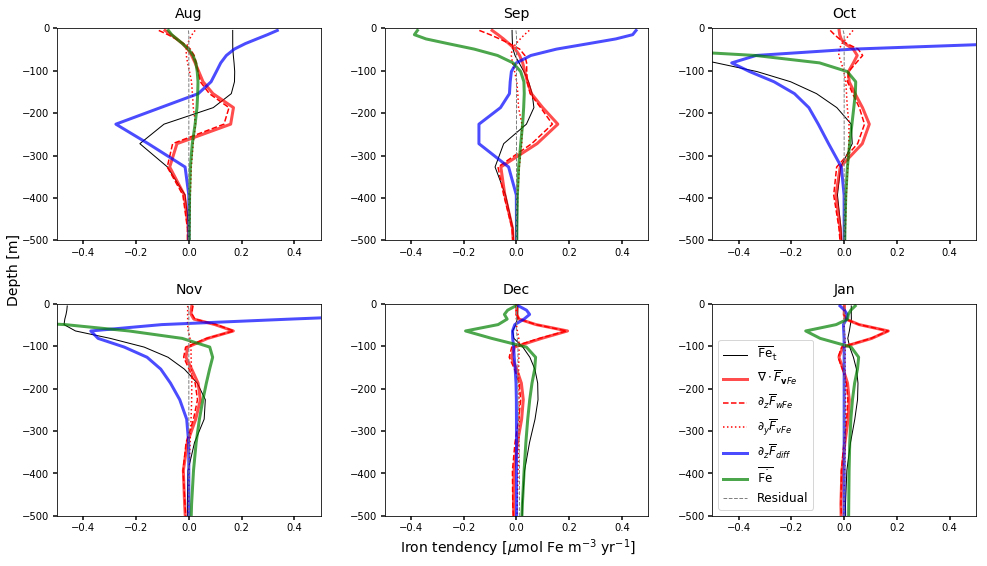

In [91]:
colors = ['pink','r','m','orange','brown','k','purple','indigo','b','c','g','y']
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(14,8))
for j in range(2):
    for i in range(3):
        nn = j*3+i+7
        if nn > 11:
            nn -= 12
        print(nn)
        axes[j,i].plot(dFe_mean[nn]*1e3*(360*86400), dFe_mean.Z, 'k',
                       lw=1, alpha=1., label=r'$\overline{\tt Fe}_t$')
        axes[j,i].plot(adv_mean[nn]*1e3*(360*86400), adv_mean.Z, 'r',
                       lw=3, alpha=0.7, label=r'$\nabla\cdot\overline{F}_{\mathbf{v} Fe}$')
        axes[j,i].plot(advz_mean[nn]*1e3*(360*86400), adv_mean.Z, 'r',
                       ls='--', label=r'$\partial_z \overline{F}_{w Fe}$')
        axes[j,i].plot(-advy_mean[nn]*1e3*(360*86400), adv_mean.Z, 'r',
                       ls=':', label=r'$\partial_y \overline{F}_{v Fe}$')
        axes[j,i].plot(dif_mean[nn]*1e3*(360*86400), dif_mean.Z, 'b',
                       lw=3, alpha=.7, label=r"$\partial_z \overline{F}_{diff}$")
#         axes[j,i].plot(kpp_mean[nn]*1e3*(360*86400), kpp_mean.Z, 'orange',
#                        lw=1, label=r"$\partial_z \overline{F}_{KPP}$")
        axes[j,i].plot(dot_mean[nn]*1e3*(360*86400), dot_mean.Z, 'g',
                       lw=3, alpha=.7, label=r"$\overline{\dot{\tt Fe}}$")
        axes[j,i].plot(res_mean[nn]*1e3*(360*86400), res_mean.Z, '--', color='grey',
                       lw=1, alpha=1., label=r"Residual")
#         ax2 = axes[j,i].twiny()
#         p2, = ax2.plot((np.absolute(wpfep_bar_II*Lx+diffe_II*nx)/
#                        np.absolute(vbarfebar_I-vbarfebar_III+wbarfebar_II
#                                    +vpfep_bar_I-vpfep_bar_III)*Lx)[j*3+i,:nz],
#                        diffe_II.Z[:nz], 'grey', lw=3, alpha=0.6
#                       )
# #         ax2.set_xlim([.1,1e1])
#         ax2.set_xscale('log')
#         ax2.xaxis.label.set_color(p2.get_color())

        tkw = dict(size=4, width=1.5)
#         ax2.tick_params(axis='x', colors=p2.get_color(), **tkw)
        axes[j,i].tick_params(axis='both', **tkw)
        
        axes[j,i].set_title(months[nn],fontsize=14,y=1.02)
        axes[j,i].set_xlim([-5e-1,5e-1])
        axes[j,i].set_ylim([-5e2,0.])
#         axes[j,i].grid(True)

axes[1,2].legend(loc='lower left', fontsize=12)
fig.subplots_adjust(left=0.12)
# cbar_ax = fig.add_axes([0.84, 0.2, 0.03, 0.6])
# cbar = fig.colorbar(cax, cax=cbar_ax)
# cbar.set_label(r'[mM N/m$^3$]',fontsize=12)

fig.text(0.01, 0.5, 'Depth [m]', 
         va='center', rotation='vertical', fontsize=14)
fig.text(0.4, 0.018, 'Iron tendency [$\mu$mol Fe m$^{-3}$ yr$^{-1}$]', 
         va='center', rotation='horizontal', fontsize=14)

plt.tight_layout(pad=2.5)
# plt.grid(True)
plt.savefig(op.join(pdir,'Figures/IronBudget_monthlyclim-Aug-Jan_20kmMLI.pdf'))

In [110]:
fe_intrp = grid.interp(Fem, 'Y', boundary='fill')
vmfem = (vm * fe_intrp).compute()
fe_intrp = grid.interp(Fem, 'Z', boundary='fill')
wmfem = (wm * fe_intrp).compute()

[########################################] | 100% Completed | 19.3s
[########################################] | 100% Completed | 15.2s


In [124]:
dwfe = advWm/ds.rA.mean('XC') - grid.interp(wFem,'Z',boundary='fill')
dvfe = advVm/(ds.drF*ds.dxG).mean('XC') - vFem

dwfe_m = grid.diff(dwfe,'Z',boundary='fill') * ds.drF**-1
dvfe_m = grid.diff(dvfe*ds.dxG.mean('XC'),
                    'Y',boundary='fill') * ds.rA.mean(['XC'])**-1
print(dwfe_m, dvfe_m)
dadv = -(-dwfe_m + dvfe_m)
dadv

<xarray.DataArray (month: 12, Z: 40, YC: 100)>
dask.array<shape=(12, 40, 100), dtype=float32, chunksize=(12, 39, 100)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ... <xarray.DataArray (month: 12, Z: 40, YC: 100)>
dask.array<shape=(12, 40, 100), dtype=float32, chunksize=(12, 40, 99)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...


<xarray.DataArray (month: 12, Z: 40, YC: 100)>
dask.array<shape=(12, 40, 100), dtype=float32, chunksize=(12, 39, 99)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ...

In [125]:
advmfem = grid.diff(vmfem*ds.dxG.mean('XC'),
                   'Y',boundary='fill') * ds.rA.mean(['XC'])**-1
adwmfem = grid.diff(wmfem,'Z',boundary='fill') * ds.drF**-1

print(advmfem, adwmfem)

<xarray.DataArray (month: 12, Z: 40, YC: 100)>
dask.array<shape=(12, 40, 100), dtype=float32, chunksize=(12, 40, 99)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ... <xarray.DataArray (month: 12, Z: 40, YC: 100)>
array([[[ 0.000000e+00, -3.801499e-12, ..., -6.027758e-14,  1.459213e-13],
        [ 0.000000e+00, -3.421471e-12, ..., -7.147448e-14,  3.567653e-14],
        ...,
        [ 0.000000e+00, -1.473204e-13, ..., -1.556830e-13,  8.953100e-14],
        [ 0.000000e+00,  2.419540e-12, ...,  7.615599e-13, -1.202502e-12]],

       [[ 0.000000e+00, -5.036700e-12, ...,  1.626365e-14,  1.608837e-13],
        [ 0.000000e+00, -4.219763e-12, ..., -6.221646e-14, -1.825434e-14],
        ...,
        [ 0.000000e+00, -1.434079e-13, ..., -9.358223e-14,  5.845479e-14],
        [ 0.000000e+00,  2.484996e-12, ...,  7.079376e-13, -1

In [126]:
vpfep_m = vFem - vmfem
advpfep_m = grid.diff(vpfep_m*ds.dxG.mean('XC'),
                     'Y',boundary='fill') * ds.rA.mean('XC')**-1
wpfep_m = grid.interp(wFem,'Z',boundary='fill') - wmfem
adwpfep_m = grid.diff(wpfep_m,'Z',boundary='fill') * ds.drF**-1

print(advpfep_m, adwpfep_m)

<xarray.DataArray (month: 12, Z: 40, YC: 100)>
dask.array<shape=(12, 40, 100), dtype=float32, chunksize=(12, 40, 99)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ... <xarray.DataArray (month: 12, Z: 40, YC: 100)>
array([[[ 0.000000e+00,  4.293400e-13, ...,  3.607738e-14, -1.628824e-14],
        [ 0.000000e+00, -3.398480e-12, ...,  3.262530e-14,  2.569888e-13],
        ...,
        [ 0.000000e+00, -1.503975e-14, ...,  2.982997e-14, -2.400170e-14],
        [ 0.000000e+00, -9.712646e-14, ..., -7.966760e-14,  3.448455e-14]],

       [[ 0.000000e+00,  1.209719e-12, ...,  5.611763e-15,  1.519258e-14],
        [ 0.000000e+00, -2.792486e-12, ..., -1.508216e-14,  1.970948e-13],
        ...,
        [ 0.000000e+00, -1.910311e-14, ...,  2.558229e-14, -1.603363e-14],
        [ 0.000000e+00, -9.340129e-14, ..., -5.643591e-14,  2

In [127]:
advmm = -(-adwmfem + advmfem)
advpp_m = -(-adwpfep_m + advpfep_m)

In [128]:
res = dFe - ((advmm+advpp_m) + difz + kpp + ss + dadv)
res

<xarray.DataArray (month: 12, Z: 40, YC: 100)>
dask.array<shape=(12, 40, 100), dtype=float32, chunksize=(12, 39, 99)>
Coordinates:
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ...
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11

In [129]:
nys,nyn = (600,1400)
with ProgressBar():
    advbb_mean = advmm.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    advpp_mean = advpp_m.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    advpp_meanz = adwpfep_m.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    advpp_meany = -advpfep_m.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    dadv_mean = dadv.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    dFe_mean = dFe.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    dif_mean = difz.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    kpp_mean = kpp.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    dot_mean = ss.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    res_mean = res.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


In [54]:
u1max = 1/1.05  # [1/d]
u2max = 1/1.3 # [1/d]
Kp1 = 0.018
Kp2 = 0.010
Ki1 = 1.05e-3
Ki2 = 5.9e-3
Kn1 = 0.035
Kn2 = 0.015
r_FeP = 1e-3
r_SiP = 16
r_NP = 16
kSi1 = Kn1 * r_SiP
kN1 = Kn1 * r_NP
kN2 = Kn2 * r_NP
kFe1 = Kn1 * r_FeP
kFe2 = Kn2 * r_FeP

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


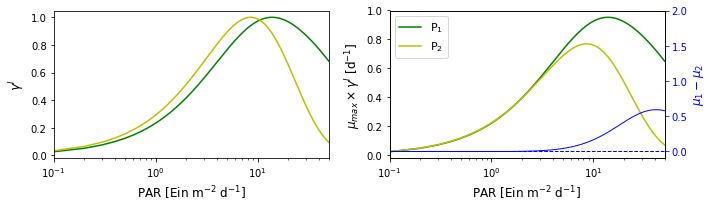

In [55]:
I = np.arange(.1,50.1,0.1)*1e6/86400
Fo = Kp1/(Kp1+Ki1)*np.exp(Ki1/Kp1*np.log(Ki1/(Kp1+Ki1)))
gammaI1_test = Fo**-1 * (1.-np.exp(-Kp1*I)) * np.exp(-Ki1*I)
Fo = Kp2/(Kp2+Ki2)*np.exp(Ki2/Kp2*np.log(Ki2/(Kp2+Ki2)))
gammaI2_test = Fo**-1 * (1.-np.exp(-Kp2*I)) * np.exp(-Ki2*I)

fig, (ax1,ax3) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
fig.set_tight_layout(True)
# ax2 = ax1.twinx()
ax4 = ax3.twinx()
ax1.plot(I*1e-6*86400, gammaI1_test, 'g')
ax1.plot(I*1e-6*86400, gammaI2_test, 'y')
ax3.plot(I*1e-6*86400, u1max*gammaI1_test, 'g', label=r'P$_1$')
ax3.plot(I*1e-6*86400, u2max*gammaI2_test, 'y', label=r'P$_2$')
ax4.plot(I*1e-6*86400, u1max*gammaI1_test-u2max*gammaI2_test, 'b', lw=1)
ax4.plot(I*1e-6*86400, np.zeros(len(I)), 'b--', lw=1)
ax1.set_xlim([.1,50.])
ax3.set_xlim([.1,50.])
ax4.set_ylim([-.1,2.])
ax1.set_ylabel(r"$\gamma^I$", fontsize=12)
ax3.set_ylabel(r"$\mu_{max}\times\gamma^I$ [d$^{-1}$]", fontsize=12)
ax4.set_ylabel(r"$\mu_1-\mu_2$", fontsize=12, color='b')
ax1.set_xlabel(r"PAR [Ein m$^{-2}$ d$^{-1}$]", fontsize=12)
ax3.set_xlabel(r"PAR [Ein m$^{-2}$ d$^{-1}$]", fontsize=12)
ax1.set_xscale('log')
ax3.set_xscale('log')
# ax4.set_xscale('log')
ax4.tick_params('y', colors='blue')
ax3.legend(loc='upper left', fontsize=11)
plt.savefig(op.join(pdir,'Figures/gammaI.pdf'))

In [56]:
dtype = '>f8'
shape = (12,100,50)
# par_north = 3e1+2e1*np.cos(np.pi/6*np.arange(1,13))
# par_ideal = par_north[:,np.newaxis] + np.linspace(-10,0,num=100)[np.newaxis,:]
PAR = np.fromfile(op.join(bdir,'PAR_noncos_linear_020km.bin'), 
                 dtype=dtype)
PAR.shape = shape
PAR = xr.DataArray(PAR, dims=['month','YC','XC'],
                  coords={'month':range(1,13),'YC':ds.YC.data,'XC':ds.XC.data}
                  )
I = PAR*1e6/86400
Fo_s = Kp2/(Kp2+Ki2)*np.exp(Ki2/Kp2
                           * np.log(Ki2/(Kp2+Ki2))
                           )
gammaI2 = Fo_s**-1 * (1.-np.exp(-Kp2*I)) * np.exp(-Ki2*I)
Fo_b = Kp1/(Kp1+Ki1)*np.exp(Ki1/Kp1
                           * np.log(Ki1/(Kp1+Ki1))
                           )
gammaI1 = Fo_b**-1 * (1.-np.exp(-Kp1*I)) * np.exp(-Ki1*I)
gammaI1

<xarray.DataArray (month: 12, YC: 100, XC: 50)>
array([[[0.814193, 0.814193, ..., 0.814193, 0.814193],
        [0.813303, 0.813303, ..., 0.813303, 0.813303],
        ...,
        [0.731028, 0.731028, ..., 0.731028, 0.731028],
        [0.730222, 0.730222, ..., 0.730222, 0.730222]],

       [[0.89953 , 0.89953 , ..., 0.89953 , 0.89953 ],
        [0.898598, 0.898598, ..., 0.898598, 0.898598],
        ...,
        [0.809694, 0.809694, ..., 0.809694, 0.809694],
        [0.808809, 0.808809, ..., 0.808809, 0.808809]],

       ...,

       [[0.839817, 0.839817, ..., 0.839817, 0.839817],
        [0.838906, 0.838906, ..., 0.838906, 0.838906],
        ...,
        [0.754317, 0.754317, ..., 0.754317, 0.754317],
        [0.753486, 0.753486, ..., 0.753486, 0.753486]],

       [[0.789485, 0.789485, ..., 0.789485, 0.789485],
        [0.788619, 0.788619, ..., 0.788619, 0.788619],
        ...,
        [0.708691, 0.708691, ..., 0.708691, 0.708691],
        [0.707909, 0.707909, ..., 0.707909, 0.707909]]])

In [57]:
N2_Fe = ds.TRAC03/(ds.TRAC03+kFe2)
N1_Fe = ds.TRAC03/(ds.TRAC03+kFe1)
N2_Fe.coords['days'] = ('time',np.tile(range(360),dy))
N1_Fe.coords['days'] = ('time',np.tile(range(360),dy))
N1_Fe

<xarray.DataArray 'TRAC03' (time: 4320, Z: 40, YC: 100, XC: 50)>
dask.array<shape=(4320, 40, 100, 50), dtype=float32, chunksize=(1, 40, 100, 50)>
Coordinates:
  * XC       (XC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    Depth    (YC, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ...
    hFacC    (Z, YC, XC) >f4 dask.array<shape=(40, 100, 50), chunksize=(40, 100, 50)>
    iter     (time) int64 dask.array<shape=(4320,), chunksize=(1,)>
  * time     (time) float64 6.221e+09 6.221e+09 6.221e+09 6.221e+09 ...
    days     (time) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [58]:
with ProgressBar():
    gamFe2_day = N2_Fe.sel(Z=slice(0.,-100.),YC=slice(6e5,14e5)
                          ).groupby('days').mean(['time','Z','YC','XC']).compute()
    gamFe1_day = N1_Fe.sel(Z=slice(0.,-100.),YC=slice(6e5,14e5)
                          ).groupby('days').mean(['time','Z','YC','XC']).compute()
gamFe1_day

[########################################] | 100% Completed | 13.3s
[########################################] | 100% Completed | 12.0s


<xarray.DataArray 'TRAC03' (days: 360)>
array([0.161427, 0.162458, 0.163535, ..., 0.1578  , 0.158623, 0.159485],
      dtype=float32)
Coordinates:
  * days     (days) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


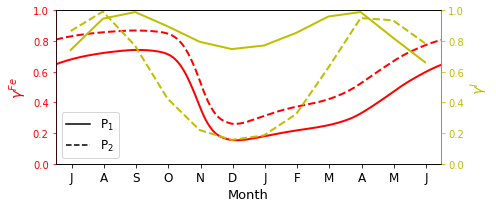

In [59]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']

fig, ax = plt.subplots(figsize=(7,3))
fig.set_tight_layout(True)
ax2 = ax.twinx()

im, = ax.plot(range(0,360), gamFe1_day.roll(days=-180), 'r', lw=2)
ax.plot(range(0,360), gamFe2_day.roll(days=-180), 'r--', lw=2)
im2, = ax2.plot(np.linspace(14,344,12), gammaI1.sel(YC=slice(6e5,14e5)).mean(['YC','XC']).roll(month=-6), 'y', lw=2)
ax2.plot(np.linspace(14,344,12), gammaI2.sel(YC=slice(6e5,14e5)).mean(['YC','XC']).roll(month=-6), 'y--', lw=2)

ax.set_xticks(np.linspace(15,345,12))
ax.set_xticklabels(np.roll(np.asarray(month),-6), fontsize=12)
ax.set_xlim([0,359])
ax.set_ylim([.0,1.0])
ax2.set_ylim([.0,1.0])
ax.spines["left"].set_edgecolor(im.get_color())
ax2.spines["right"].set_edgecolor(im2.get_color())
ax.tick_params(axis='y', colors=im.get_color())
ax2.tick_params(axis='y', colors=im2.get_color())

ax.set_xlabel(r"Month", fontsize=13)
ax.set_ylabel(r'$\gamma^{Fe}$', color='r', fontsize=14)
ax2.set_ylabel(r'$\gamma^{I}$', color='y', fontsize=14)
linestyles = ['-', "--"]
dummy_lines = [ax.plot([],[], c="black", ls = linestyles[0])[0]]
dummy_lines.append(ax.plot([],[], c="black", ls = linestyles[1])[0])
legend = ax.legend([dummy_lines[i] for i in [0,1]], ["P$_1$", "P$_2$"], loc=3, fontsize=12)
plt.savefig(op.join(pdir,'Figures/Gamma_Fe-and-PAR_20km.pdf'))

(-1000.0, 0.0)

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


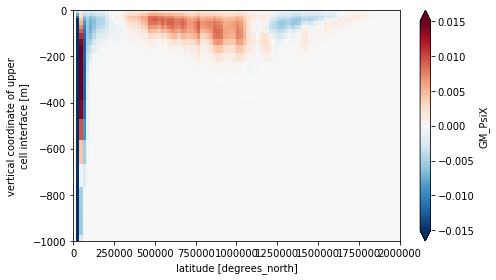

In [12]:
fig, ax = plt.subplots(figsize=(7,4))
fig.set_tight_layout(True)
dsGM.GM_PsiX.mean(['time','XG']).plot(ax=ax, vmax=.015, vmin=-.015, cmap='RdBu_r')
ax.set_ylim([-1e3,0.])

(-1000.0, 0.0)

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


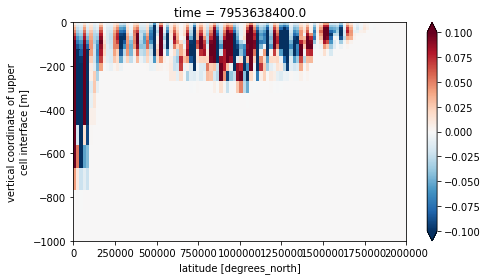

In [14]:
fig, ax = plt.subplots(figsize=(7,4))
fig.set_tight_layout(True)
(wMLI[255]*86400).mean(['XC']).plot(vmax=1e-1)
ax.set_ylim([-1e3,0.])

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


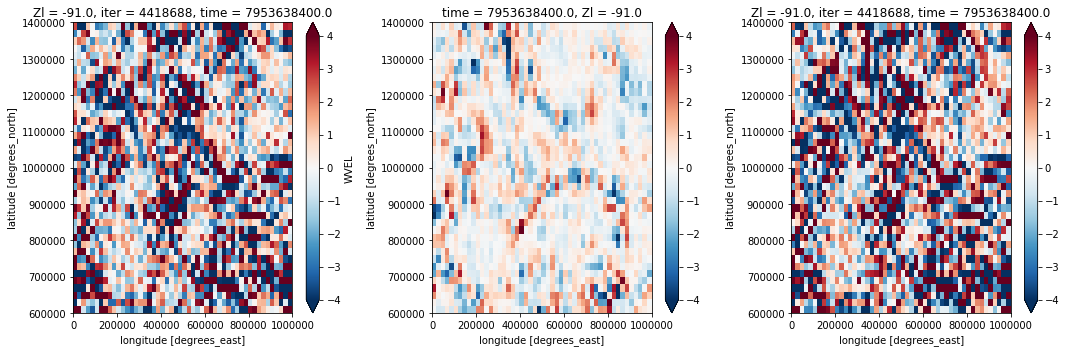

In [17]:
nZl = 7
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
fig.set_tight_layout(True)
(ds.WVEL[255,nZl].sel(YC=slice(6e5,14e5))*86400).plot(ax=ax1, vmax=4e0)
(wMLI[255,nZl].sel(YC=slice(6e5,14e5))*86400).plot(ax=ax2, vmax=4e0)
((ds.WVEL[255,nZl]-wMLI[255,nZl]).sel(YC=slice(6e5,14e5))*86400).plot(ax=ax3, vmax=4e0)

In [18]:
wMLI.to_dataset(name='w').to_netcdf(op.join(bdir,'wMLI_20km.nc'))